<a href="https://colab.research.google.com/github/Hamza1122/travel_pakage_prediction/blob/main/travel_package.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**

To predict which customer is more likely to purchase the newly introduced travel package.


Project Steps


*   Exploratory Data Analysis on the data
*   Data Pre-processing
*   Model building - Bagging
*   Model building - Boosting
*   Model performance evaluation




# Let's start by importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

import xgboost as xgb
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier, ExtraTreesClassifier)




from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder,OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,recall_score,confusion_matrix

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import GridSearchCV
from sklearn import tree


from sklearn.ensemble import StackingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC

from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score, roc_curve, confusion_matrix, precision_recall_curve

from imblearn.over_sampling import RandomOverSampler


from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()


from sklearn.model_selection import KFold

**1. Perform an Exploratory Data Analysis on the data**

# Load and overview the dataset

In [ ]:
df =pd.read_excel('data.xlsx')

# Count Plot

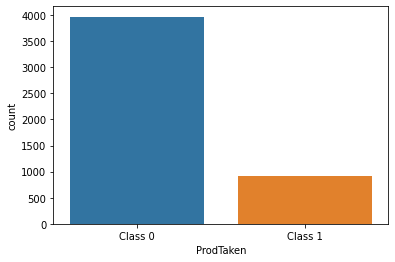

In [ ]:
#Checking class Imbalancing 
g = sns.countplot(df['ProdTaken'])
g.set_xticklabels(['Class 0','Class 1'])
plt.show()

In [ ]:
df.head(10)  #random sample of data

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0
5,200005,0,32.0,Company Invited,1,8.0,Salaried,Male,3,3.0,Basic,3.0,Single,1.0,0,5,1,1.0,Executive,18068.0
6,200006,0,59.0,Self Enquiry,1,9.0,Small Business,Female,2,2.0,Basic,5.0,Divorced,5.0,1,2,1,1.0,Executive,17670.0
7,200007,0,30.0,Self Enquiry,1,30.0,Salaried,Male,3,3.0,Basic,3.0,Married,2.0,0,2,0,1.0,Executive,17693.0
8,200008,0,38.0,Company Invited,1,29.0,Salaried,Male,2,4.0,Standard,3.0,Unmarried,1.0,0,3,0,0.0,Senior Manager,24526.0
9,200009,0,36.0,Self Enquiry,1,33.0,Small Business,Male,3,3.0,Deluxe,3.0,Divorced,7.0,0,3,1,0.0,Manager,20237.0


# Shape of Dataset

In [ ]:
df.shape      #shape of data

(4888, 20)

In [ ]:
df.dtypes     #data types of various attributes

CustomerID                    int64
ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Occupation                   object
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

# Summary of Dataset

In [ ]:
df.describe()   #statistical summary

,CustomerID,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,202443.500000,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,1411.188388,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,200000.000000,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,201221.750000,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,202443.500000,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,203665.250000,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,204887.000000,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


# Checking Missing Values

In [ ]:
df.isnull().sum()  #missing values


CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

# **Univariate Analysis**

> Histogram

> Boxplot

> Countplot

> Distribution plot








# **Histogram**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf6c88e4d0>,
      dtype=object)

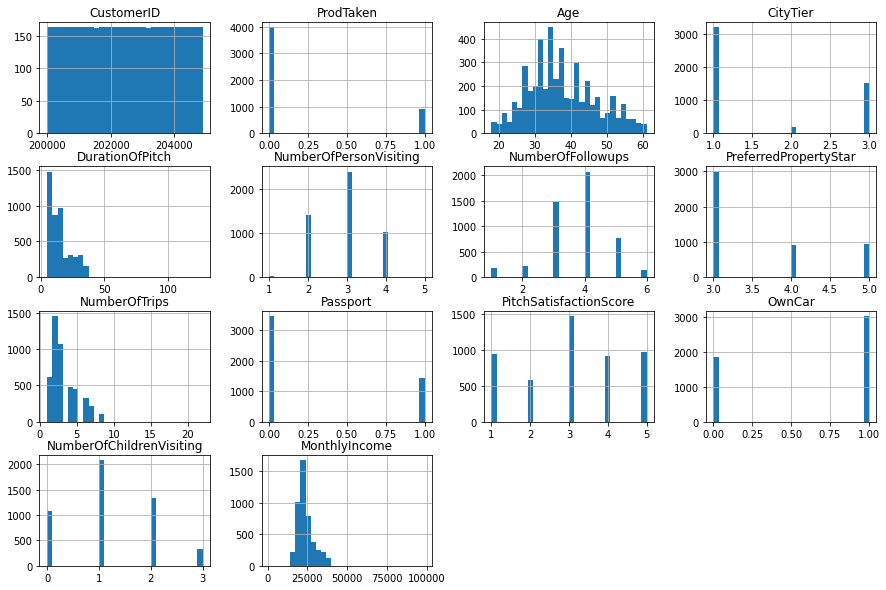

In [ ]:
df.hist(bins=30, figsize=(15, 10))

#**Boxplot**

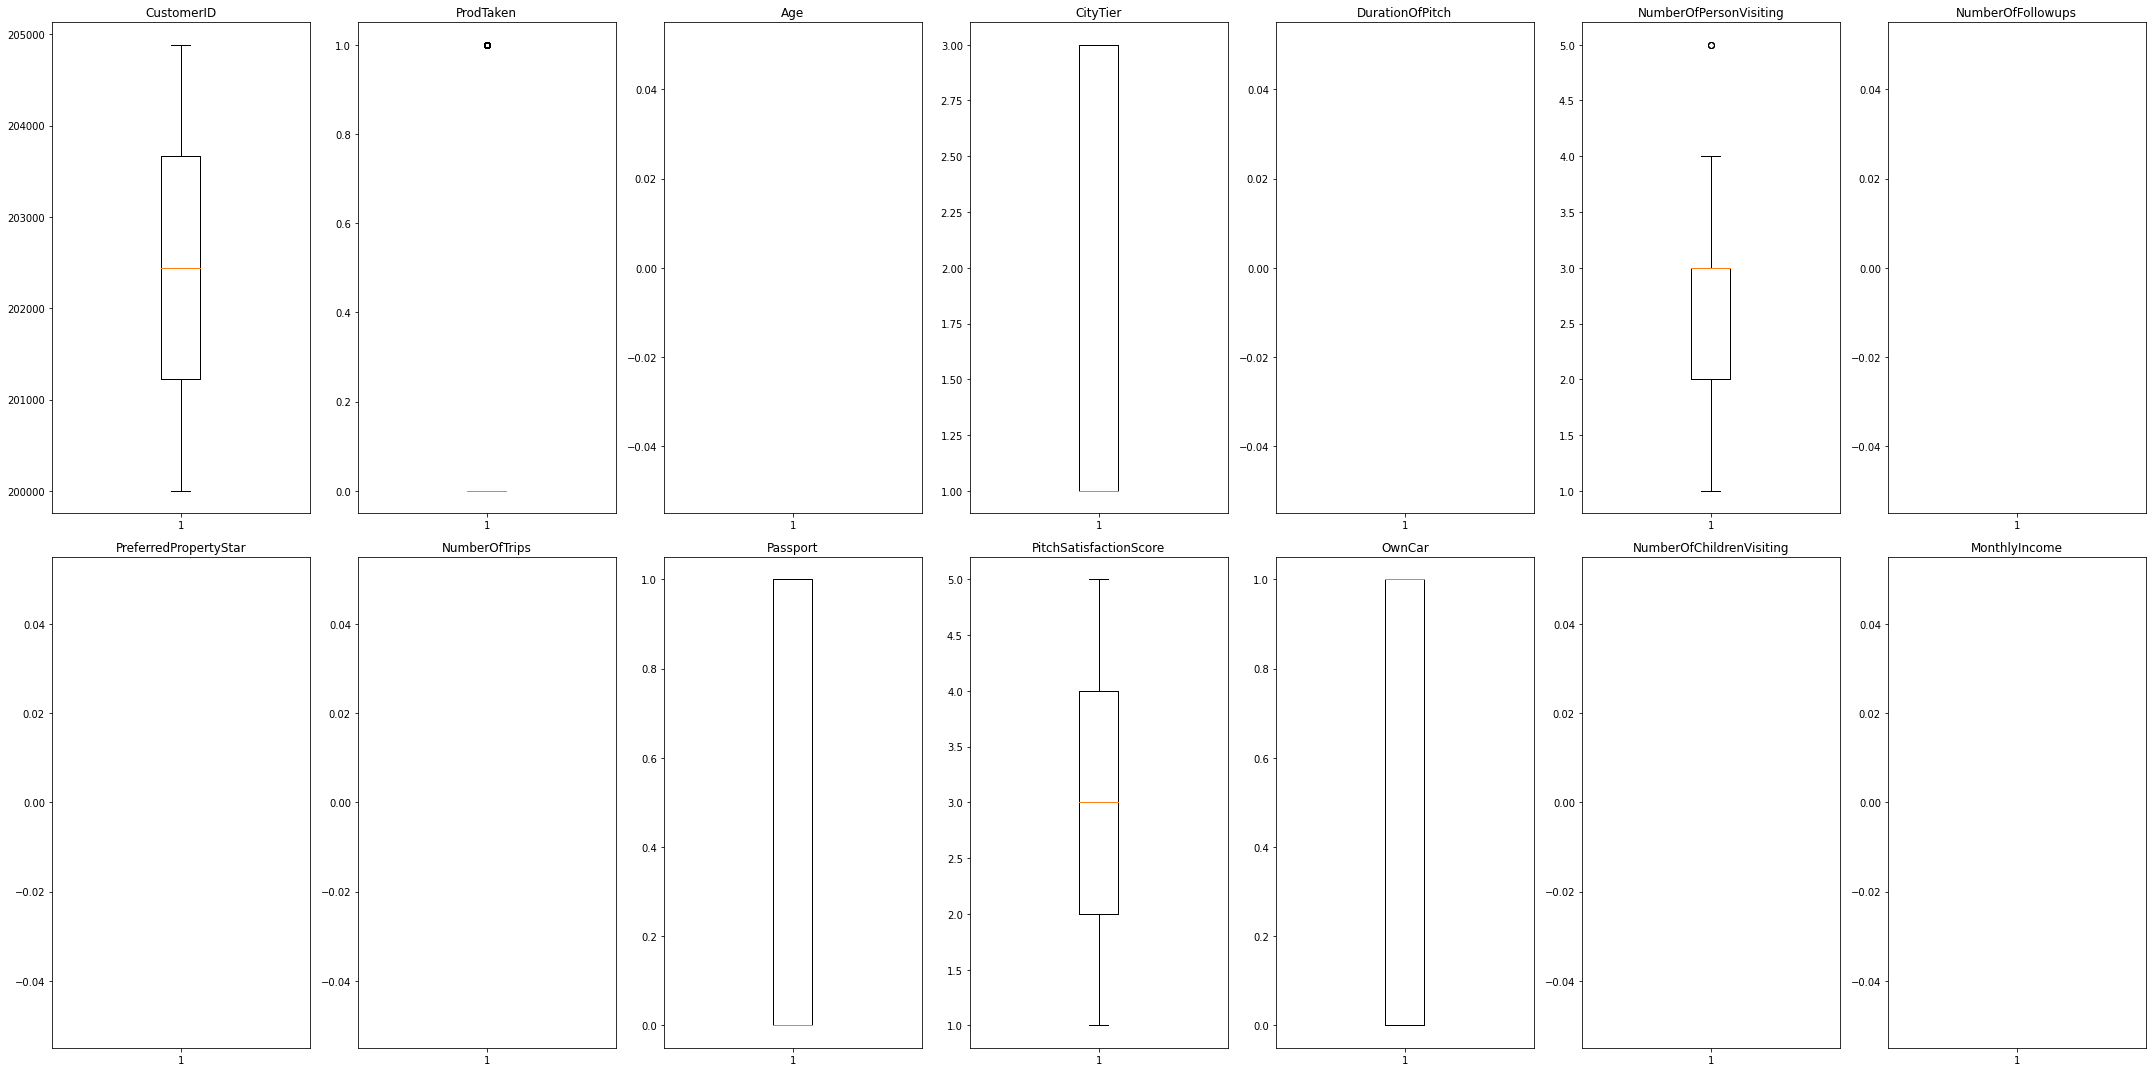

In [ ]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30,15))

for i, variable in enumerate(numerical_col):
                     plt.subplot(2,7,i+1)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#**CountPlot**

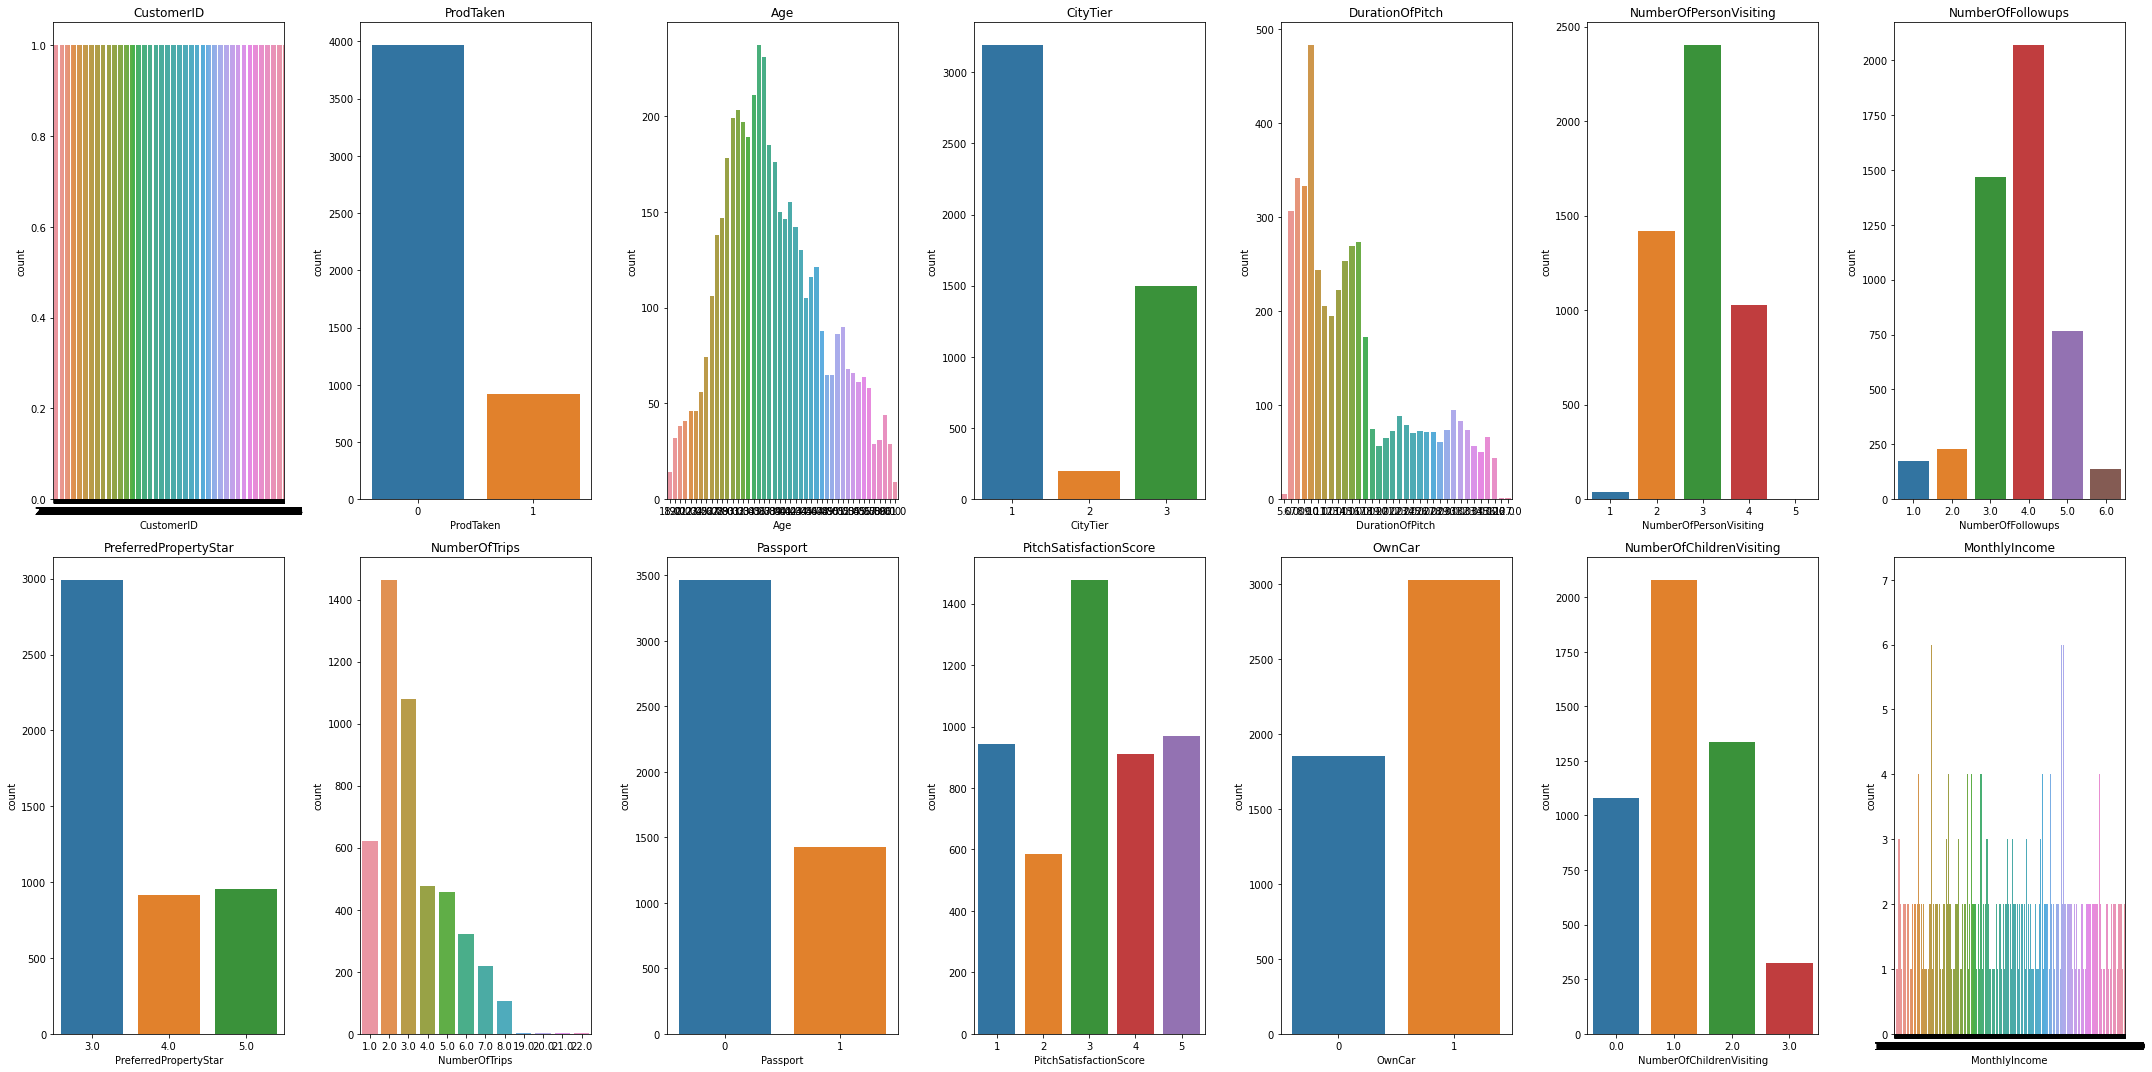

In [ ]:
# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30,15))

for i, variable in enumerate(numerical_col):
                     plt.subplot(2,7,i+1)
                     sns.countplot(df[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#**Distribution Plot**

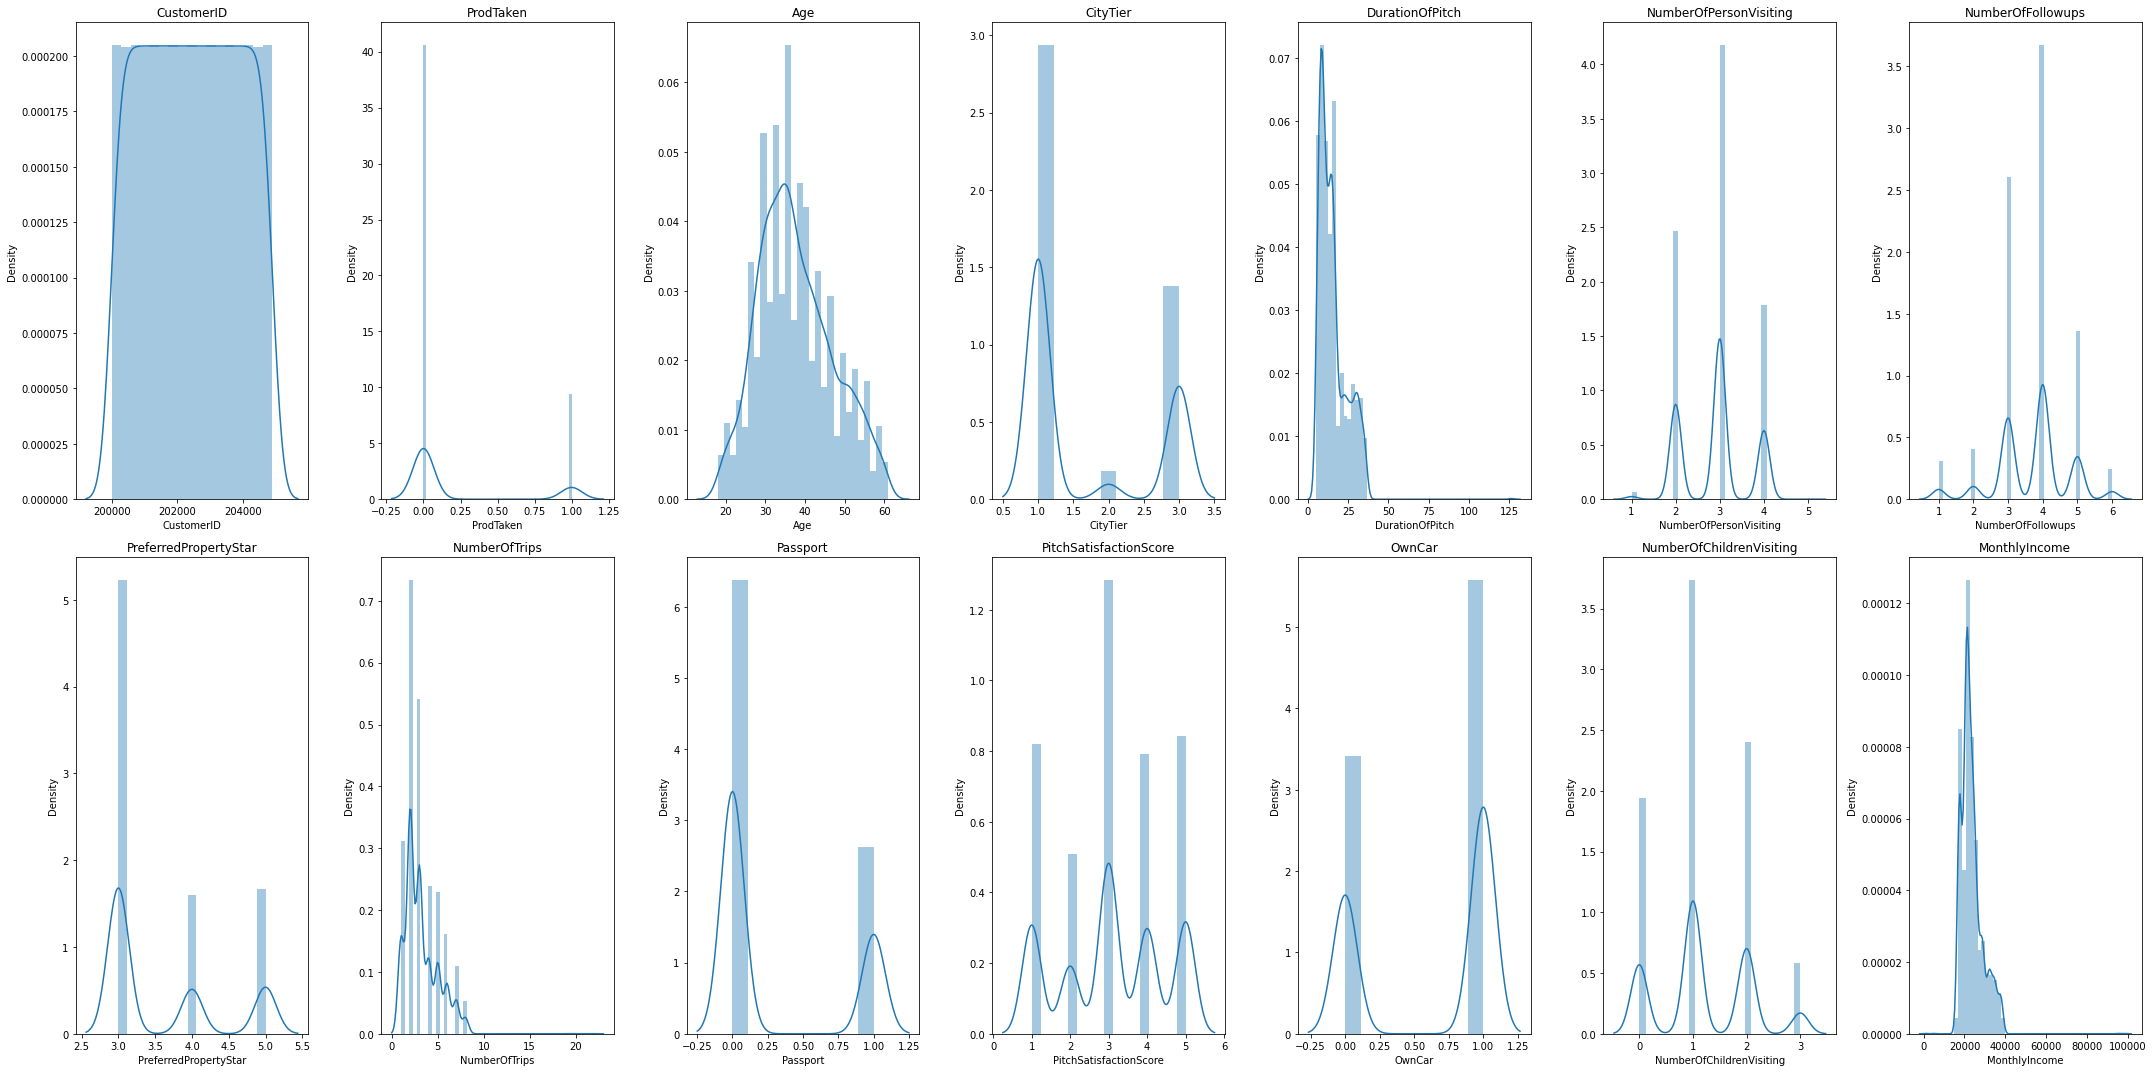

In [ ]:

# outlier detection using boxplot
numerical_col = df.select_dtypes(include=np.number).columns.tolist()
plt.figure(figsize=(30,15))

for i, variable in enumerate(numerical_col):
                     plt.subplot(2,7,i+1)
                     sns.distplot(df[variable])
                     plt.tight_layout()
                     plt.title(variable)

plt.show()

#**Bivariate Analysis**

> Correlation matrix

> Pairplot







#**Correlation Matrix**

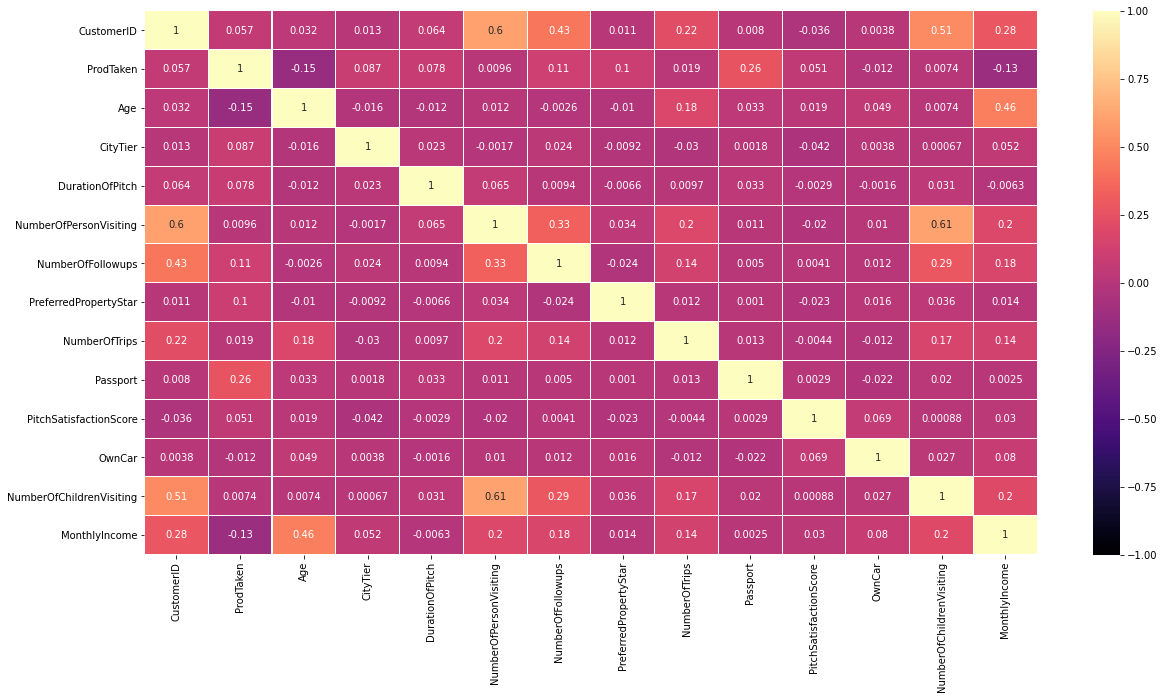

In [ ]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="magma", annot=True, linewidth=0.1)
plt.show()


#**Pairplot**

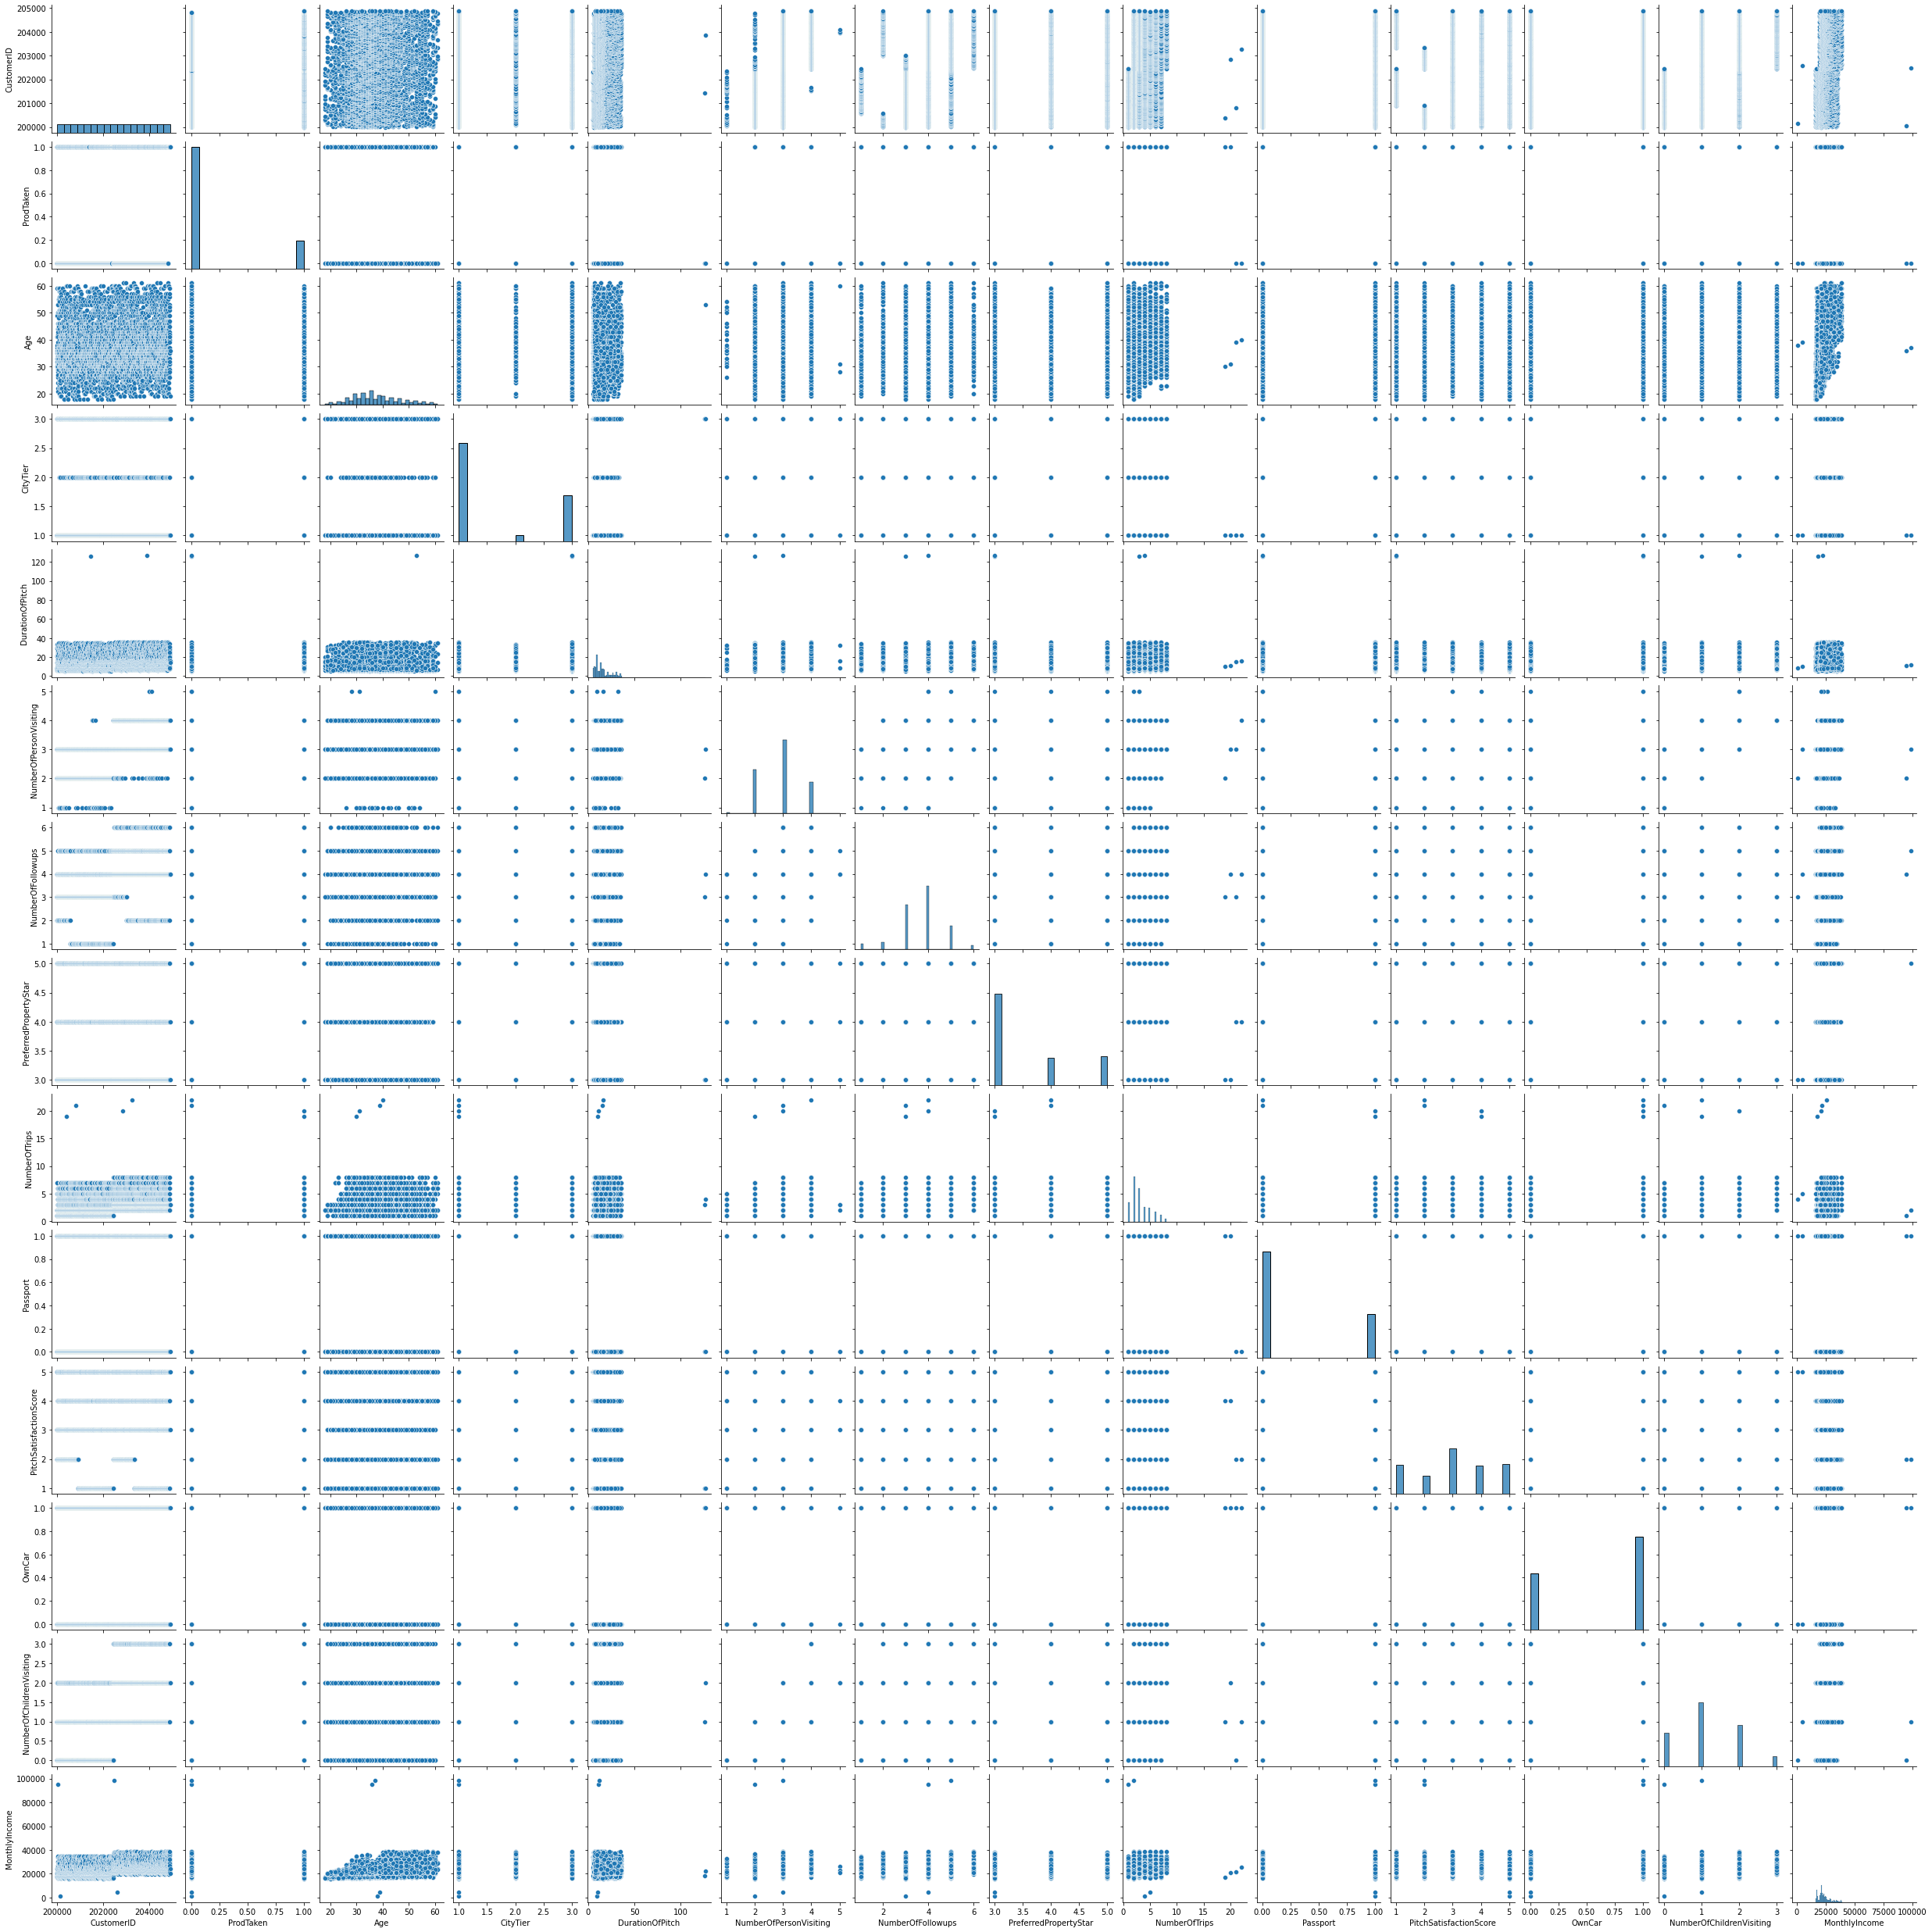

In [ ]:
sns.pairplot(df)

#**3. Data Pre-processing**

# Pre-Processing Functions

In [ ]:
#remove outlier function
def remove_outlier_value(data):
  data = data.clip(lower=data.quantile(0.05), upper=data.quantile(0.95),axis=1)
  return data

#standard scaler function
def standard_scaler(data):
  scaler = StandardScaler()
  scaler.fit_transform(data)
  return data 


#min max scaler function  
def min_max_scaler(data):
  scaler = MinMaxScaler()
  columns=data.columns
  data = scaler.fit_transform(data)
  data = pd.DataFrame(data, columns = columns)
  return data 

In [ ]:
from sklearn.model_selection import train_test_split
def model_selection(X,y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,shuffle=True)
  return X_train,y_train,X_test,y_test

In [ ]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,train,test,train_y,test_y,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    
    score_list=[] 
    
    pred_train = model.predict(train)
    pred_test = model.predict(test)
    
    train_acc = accuracy_score(pred_train,train_y)
    test_acc = accuracy_score(pred_test,test_y)
    
    train_recall = recall_score(train_y,pred_train)
    test_recall = recall_score(test_y,pred_test)
    
    train_precision = precision_score(train_y,pred_train)
    test_precision = precision_score(test_y,pred_test)
    
    train_f1 = f1_score(train_y,pred_train)
    test_f1 = f1_score(test_y,pred_test)
    
    
    score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision,train_f1,test_f1))
        
     # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,train_y))
        print("Accuracy on test set : ",accuracy_score(pred_test,test_y))
        print("Recall on training set : ",recall_score(train_y,pred_train))
        print("Recall on test set : ",recall_score(test_y,pred_test))
        print("Precision on training set : ",precision_score(train_y,pred_train))
        print("Precision on test set : ",precision_score(test_y,pred_test))
        print("F1 on training set : ",f1_score(train_y,pred_train))
        print("F1 on test set : ",f1_score(test_y,pred_test))
    
    return score_list # returning the list with train and test scores

In [ ]:
def make_confusion_matrix(model,X_test,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
#one hot encoding function
def one_hot_encoding(data,columns):
  data = pd.get_dummies(data)
  return data 

#label encoding function
def label_encoding(data,columns):
  le = LabelEncoder()
  
  for col in columns:
    data[col] = le.fit_transform(data[col])
    
  return data

In [ ]:
data=df.copy()
data=data.dropna()  #dropping null values
acc_table={}

In [ ]:
column = ['TypeofContact','Occupation','Gender','ProductPitched','MaritalStatus','Designation']

#**4. Model building - Bagging**

# VIF Model Function

In [ ]:
def vif_model(result):
  vif = pd.DataFrame()

  vif["VIF Factor"] = [variance_inflation_factor(result.values, i) for i in range(result.shape[1])]
  vif["features"] = result.columns

  return vif

# Decision Tree Model Function

In [ ]:
def decision_tree_classifier(X_train,y_train,X_test,y_test,case):
  print('-------------------------Decision Tree-------------------------------------------')
  params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]} #paramters

  grid = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5)  #calling gridsearch with hyper_paramter
  
  
  grid.fit(X_train, y_train)
  

  print("Best parameters set found on development set:")
  print()
  print(grid.best_params_)
  print()
  
  
  scores_LR = get_metrics_score(grid,X_train,X_test,y_train,y_test,flag=True)
  
  acc_table["Initial Decision Tree "+str(case)] = scores_LR

  return print(make_confusion_matrix(grid,X_test,y_test))
   

# Random Forest Model Function

In [ ]:
def random_forest_classifier(X_train,y_train,X_test,y_test,case):
  print('-------------------------------Random Forest------------------------------')
  random_forest = RandomForestClassifier()

  n_estimators = [100, 300]
  max_depth = [5, 8, 15, 25, 30]
  min_samples_split = [2, 5, 10, 15, ]
  min_samples_leaf = [1, 2, 5] 
  
  #paramtters
  parameters = dict(n_estimators = n_estimators, max_depth = max_depth,  
               min_samples_split = min_samples_split, 
               min_samples_leaf = min_samples_leaf)

  grid = GridSearchCV(random_forest,parameters, cv = 5, verbose = 1, n_jobs =-1)   #calling gridsearch with hyper_paramter

  

  forest = grid.fit(X_train, y_train)

  print("Best parameters set found on development set:")
  print()
  print(grid.best_params_)
  print()


  scores_LR = get_metrics_score(grid,X_train,X_test,y_train,y_test,flag=True)
  
  acc_table["Initial Random Forest"+str(case)] = scores_LR

  return print(make_confusion_matrix(grid,X_test,y_test))

# Logistic Regression Model Function

In [ ]:
def logistic_regression_classifier(X_train,y_train,X_test,y_test,case):
 
  logistic_regression = LogisticRegression(random_state=0).fit(X_train, y_train)
  
  scores_LR = get_metrics_score(logistic_regression,X_train,X_test,y_train,y_test,flag=True)
  acc_table["Initial Logistic Regression"+str(case)] = scores_LR

  return print(make_confusion_matrix(logistic_regression,X_test,y_test))

In [ ]:
data=data.dropna()   #dropping null values

In [ ]:
y=data['ProdTaken']   #selecting target variables
X=data.drop(['ProdTaken'],axis=1)

#**VIF Collinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def multicollinearity_check(X, thresh=5.0):
    data_type = X.dtypes
    # print(type(data_type))
    int_cols = \
    X.select_dtypes(include=['int', 'int16', 'int32', 'int64', 'float', 'float16', 'float32', 'float64']).shape[1]
    total_cols = X.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception('All the columns should be integer or float, for multicollinearity test.')
        else:
            variables = list(range(X.shape[1]))
            dropped = True
            print('''\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.\n\n''')
            while dropped:
                dropped = False
                vif = [variance_inflation_factor(X.iloc[:, variables].values, ix) for ix in variables]
                print('\n\nvif is: ', vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print('dropping \'' + X.iloc[:, variables].columns[maxloc] + '\' at index: ' + str(maxloc))
                    # del variables[maxloc]
                    X.drop(X.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X.shape[1]))
                    dropped = True

            print('\n\nRemaining variables:\n')
            print(X.columns[variables])
            # return X.iloc[:,variables]
            return X
    except Exception as e:
        print('Error caught: ', e)


        

In [ ]:
categorical_features = X.select_dtypes(include=[np.object])
vif_features = X.select_dtypes(exclude=[np.object])
vif_features = multicollinearity_check(vif_features, thresh=5.0)




The VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 5.




vif is:  [88.06705381950201, 22.19672664407307, 4.315899665240597, 4.483189192379869, 29.827800200211446, 17.252134666161623, 21.364370698856895, 4.504575846099074, 1.4240427457697176, 6.0832934294813175, 2.6116786826840612, 4.87174193904776, 35.658899072972375]
dropping 'CustomerID' at index: 0


vif is:  [20.470560673619236, 4.192691409420792, 4.361210989131871, 26.07785685959934, 15.820533996583563, 16.002622245568233, 4.501465255980729, 1.4199180039013557, 5.721686362424364, 2.597864911075547, 4.682548327644482, 32.5885194110982]
dropping 'MonthlyIncome' at index: 11


vif is:  [14.211141696924047, 4.093045723916633, 4.339914671408402, 25.39641023381884, 15.17053972061274, 15.391947449489491, 4.500379021613875, 1.4198948078922684, 5.669745793783981, 2.580334

In [ ]:
X = pd.concat([categorical_features,vif_features], axis=1) #concatenating of vif features with categorical features
X

,TypeofContact,Occupation,Gender,ProductPitched,MaritalStatus,Designation,CityTier,DurationOfPitch,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting
0,Self Enquiry,Salaried,Female,Deluxe,Single,Manager,3,6.0,1.0,1,2,1,0.0
1,Company Invited,Salaried,Male,Deluxe,Divorced,Manager,1,14.0,2.0,0,3,1,2.0
2,Self Enquiry,Free Lancer,Male,Basic,Single,Executive,1,8.0,7.0,1,3,0,0.0
3,Company Invited,Salaried,Female,Basic,Divorced,Executive,1,9.0,2.0,1,5,1,1.0
5,Company Invited,Salaried,Male,Basic,Single,Executive,1,8.0,1.0,0,5,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,Self Enquiry,Small Business,Male,Deluxe,Unmarried,Manager,3,9.0,2.0,1,1,1,1.0
4884,Company Invited,Salaried,Male,Basic,Single,Executive,1,31.0,3.0,1,3,1,2.0
4885,Self Enquiry,Salaried,Female,Standard,Married,Senior Manager,3,17.0,7.0,0,1,1,3.0
4886,Self Enquiry,Small Business,Male,Basic,Single,Executive,3,16.0,3.0,0,5,0,2.0


In [ ]:
sm = RandomOverSampler(sampling_strategy='minority')

kf = KFold(n_splits=4)  #kfold with 5 splits

column_names=[]
column_names.append(X.columns)  #storing dataframe columns into a list



#**Decision Tree with Multiple Functions**

**Standard Scaler, Label Encoding, Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_1(X,y):
  X = label_encoding(X,column)
  X = standard_scaler(X)
  X = remove_outlier_value(X)
  
  X, y = sm.fit_sample(X, y.ravel())
  
  X= pd.DataFrame(X,columns=column_names)
  y= pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   12.9s finished


Best parameters set found on development set:

{'max_leaf_nodes': 98, 'min_samples_split': 2}

Accuracy on training set :  0.8698185077302263
Accuracy on test set :  0.848112778535698
Recall on training set :  0.9229390681003584
Recall on test set :  0.9117379435850773
Precision on training set :  0.8343458890238963
Precision on test set :  0.8087167070217918
F1 on training set :  0.8764092746224207
F1 on test set :  0.8571428571428572
None
None


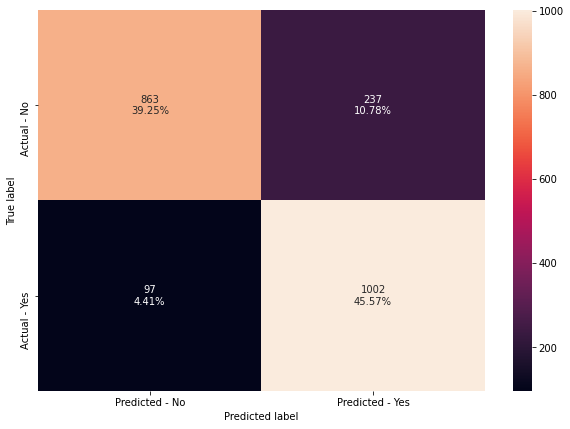

In [ ]:
print(decision_tree_test_case_1(X,y))

In [ ]:
acc_table

{'Initial Decision Tree test_case_1': [0.8698185077302263,
  0.848112778535698,
  0.9229390681003584,
  0.9117379435850773,
  0.8343458890238963,
  0.8087167070217918,
  0.8764092746224207,
  0.8571428571428572]}

**Standard Scaler, One-hot Encoding, Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_2(X,y):
  X = standard_scaler(X)
  X = one_hot_encoding(X,column)
  X = remove_outlier_value(X)
  
  X, y = sm.fit_sample(X, y.ravel())
  
  X = pd.DataFrame(X,columns=column_names)
  y = pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.1s finished


Best parameters set found on development set:

{'max_leaf_nodes': 98, 'min_samples_split': 2}

Accuracy on training set :  0.8635447008738517
Accuracy on test set :  0.8399272396543883
Recall on training set :  0.8875448028673835
Recall on test set :  0.8808007279344859
Precision on training set :  0.8469431380932022
Precision on test set :  0.8141295206055509
F1 on training set :  0.8667687595712098
F1 on test set :  0.8461538461538461
None
None


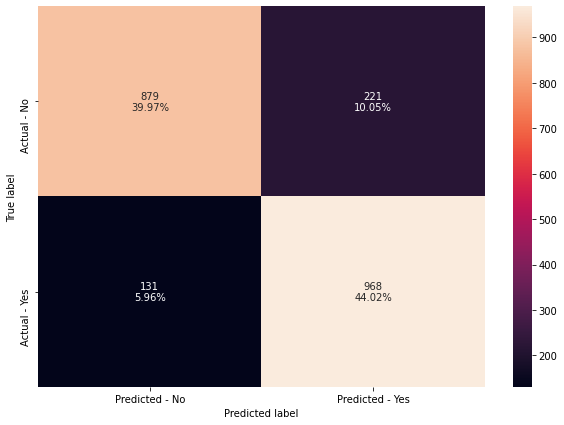

In [ ]:
print(decision_tree_test_case_2(X,y))

**Standard Scaler, Label Encoding, Not-Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_3(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_3")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.2s finished


Best parameters set found on development set:

{'max_leaf_nodes': 95, 'min_samples_split': 2}

Accuracy on training set :  0.8758682500560161
Accuracy on test set :  0.8626648476580264
Recall on training set :  0.9260752688172043
Recall on test set :  0.9208371246587808
Precision on training set :  0.8416123778501629
Precision on test set :  0.8247758761206194
F1 on training set :  0.8818259385665529
F1 on test set :  0.8701633705932932
None
None


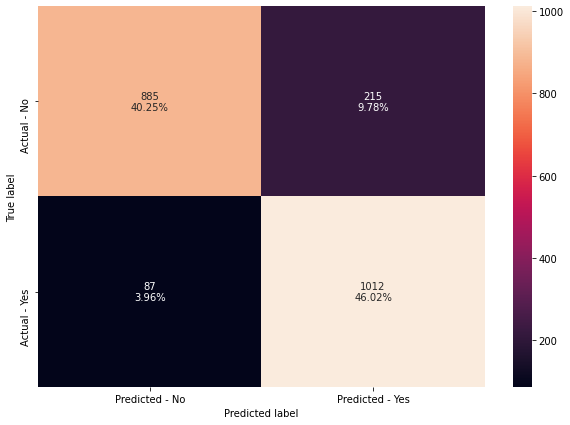

In [ ]:
print(decision_tree_test_case_3(X,y))

**Standard Scaler, One-Hot Encoding, Not-Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_4(X,y):
  X = standard_scaler(X)
  X = one_hot_encoding(X,column)
  
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.3s finished


Best parameters set found on development set:

{'max_leaf_nodes': 99, 'min_samples_split': 2}

Accuracy on training set :  0.8812457987900515
Accuracy on test set :  0.8467485220554798
Recall on training set :  0.9368279569892473
Recall on test set :  0.9062784349408554
Precision on training set :  0.8431451612903226
Precision on test set :  0.8097560975609757
F1 on training set :  0.8875212224108658
F1 on test set :  0.8553027050236152
None
None


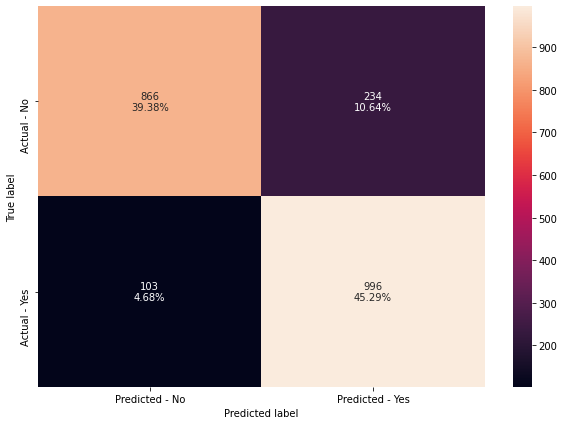

In [ ]:
print(decision_tree_test_case_4(X,y))

**Min-Max Scaler, Label Encoding, Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_5(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_5")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.1s finished


Best parameters set found on development set:

{'max_leaf_nodes': 99, 'min_samples_split': 2}

Accuracy on training set :  0.8693703786690566
Accuracy on test set :  0.8485675306957708
Recall on training set :  0.9189068100358423
Recall on test set :  0.913557779799818
Precision on training set :  0.8361190379127599
Precision on test set :  0.8083735909822867
F1 on training set :  0.8755602988260405
F1 on test set :  0.8577530969671081
None
None


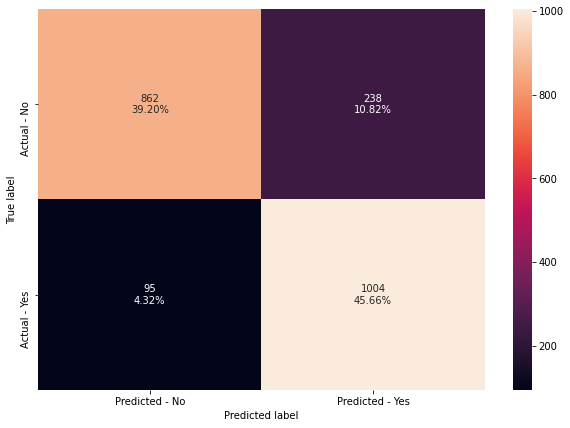

In [ ]:
print(decision_tree_test_case_5(X,y))

**Min-Max Scaler, Label Encoding, Removing Outliers, Decision Tree,**

In [ ]:
def decision_tree_test_case_6(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)
  
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return decision_tree_classifier(X_train,y_train,X_test,y_test,case="test_case_6")


-------------------------Decision Tree-------------------------------------------
Fitting 5 folds for each of 294 candidates, totalling 1470 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1470 out of 1470 | elapsed:   13.0s finished


Best parameters set found on development set:

{'max_leaf_nodes': 99, 'min_samples_split': 2}

Accuracy on training set :  0.8742997983419225
Accuracy on test set :  0.8353797180536607
Recall on training set :  0.9368279569892473
Recall on test set :  0.9099181073703366
Precision on training set :  0.8327359617682198
Precision on test set :  0.7917656373713381
F1 on training set :  0.8817204301075269
F1 on test set :  0.8467400508044032
None
None


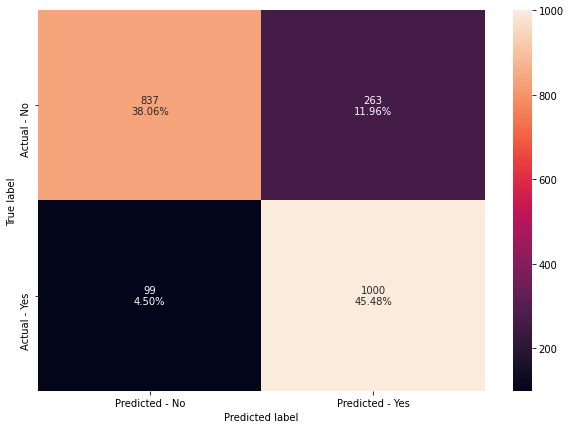

In [ ]:
print(decision_tree_test_case_6(X,y))

#**Random Forest Classifier**

**Standard Scaler, Label Encoding, Removing Outliers, Random Forest**

In [ ]:
def random_forest_test_case_7(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return random_forest_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


-------------------------------Random Forest------------------------------
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   21.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


Best parameters set found on development set:

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy on training set :  0.9995518709388304
Accuracy on test set :  0.9781718963165075
Recall on training set :  1.0
Recall on test set :  0.9963603275705186
Precision on training set :  0.999104744852283
Precision on test set :  0.961369622475856
F1 on training set :  0.9995521719659651
F1 on test set :  0.9785522788203753
None
None


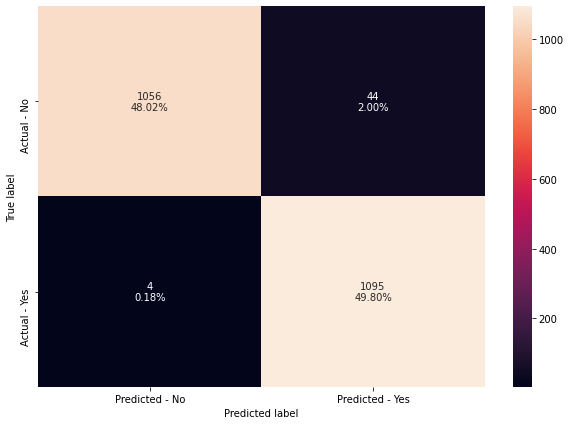

In [ ]:
print(random_forest_test_case_7(X,y))

**Min Max Scaler, Label Encoding, Removing Outliers, Random Forest**

In [ ]:
def random_forest_test_case_8(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return random_forest_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


-------------------------------Random Forest------------------------------
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


Best parameters set found on development set:

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Accuracy on training set :  0.9995518709388304
Accuracy on test set :  0.9718053660754888
Recall on training set :  1.0
Recall on test set :  0.9936305732484076
Precision on training set :  0.999104744852283
Precision on test set :  0.9520488230165649
F1 on training set :  0.9995521719659651
F1 on test set :  0.9723953695458594
None
None


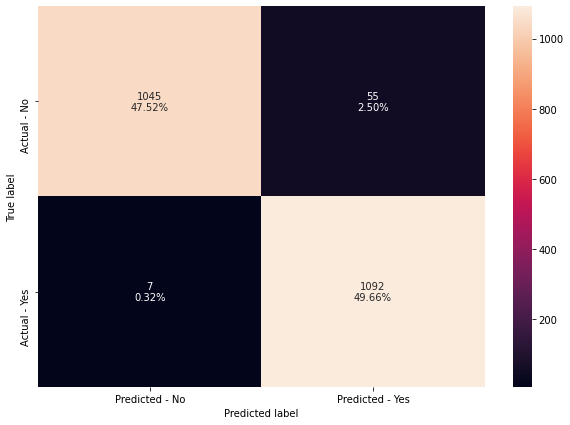

In [ ]:
print(random_forest_test_case_8(X,y))

**Min Max Scaler, One-Hot Encoding, Removing Outliers, Random Forest**

In [ ]:
def random_forest_test_case_9(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return random_forest_classifier(X_train,y_train,X_test,y_test,case="test_case_3")


-------------------------------Random Forest------------------------------
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


Best parameters set found on development set:

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Accuracy on training set :  0.9995518709388304
Accuracy on test set :  0.9745338790359254
Recall on training set :  1.0
Recall on test set :  0.997270245677889
Precision on training set :  0.999104744852283
Precision on test set :  0.9538729329852045
F1 on training set :  0.9995521719659651
F1 on test set :  0.9750889679715302
None
None


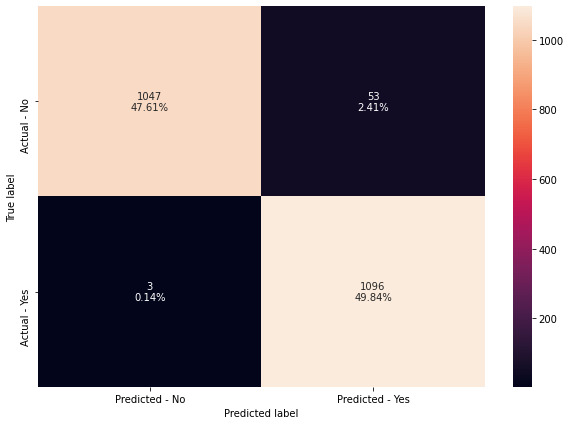

In [ ]:
print(random_forest_test_case_9(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers, Random Forest**


In [ ]:
def random_forest_test_case_10(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return random_forest_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


-------------------------------Random Forest------------------------------
Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  5.2min finished


Best parameters set found on development set:

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Accuracy on training set :  0.9997759354694152
Accuracy on test set :  0.9740791268758526
Recall on training set :  1.0
Recall on test set :  0.9899909008189263
Precision on training set :  0.999552171965965
Precision on test set :  0.9594356261022927
F1 on training set :  0.9997760358342664
F1 on test set :  0.9744738020600089
None
None


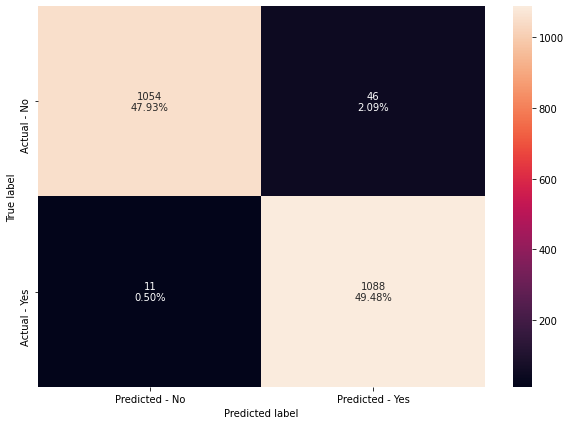

In [ ]:
print(random_forest_test_case_10(X,y))

#**Logistic Regression**

**Standard Scaler, Label Encoding, Removing Outliers, Logistic Regression**

In [ ]:
def logistic_regression_test_case_11(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return logistic_regression_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


Accuracy on training set :  0.7080439166479946
Accuracy on test set :  0.6866757617098681
Recall on training set :  0.6904121863799283
Recall on test set :  0.651501364877161
Precision on training set :  0.7157454714352067
Precision on test set :  0.700587084148728
F1 on training set :  0.7028506271379703
F1 on test set :  0.6751532296086751
None
None


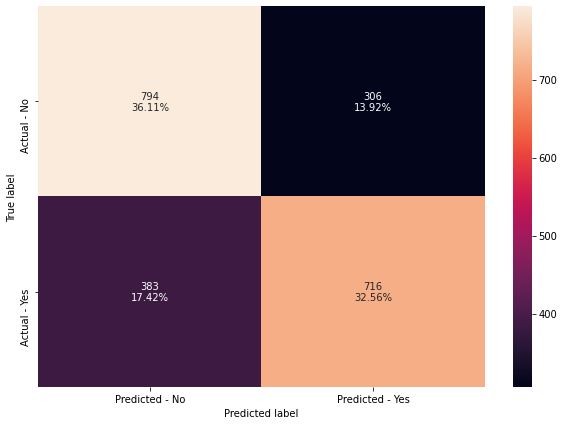

In [ ]:
print(logistic_regression_test_case_11(X,y))


**Min Max Scaler, Label Encoding, Removing Outliers, Logistic Regression**


In [ ]:
def logistic_regression_test_case_12(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return logistic_regression_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


Accuracy on training set :  0.7044588841586377
Accuracy on test set :  0.6871305138699408
Recall on training set :  0.6814516129032258
Recall on test set :  0.651501364877161
Precision on training set :  0.7144199154532644
Precision on test set :  0.7012732615083251
F1 on training set :  0.6975464343040587
F1 on test set :  0.6754716981132075
None
None


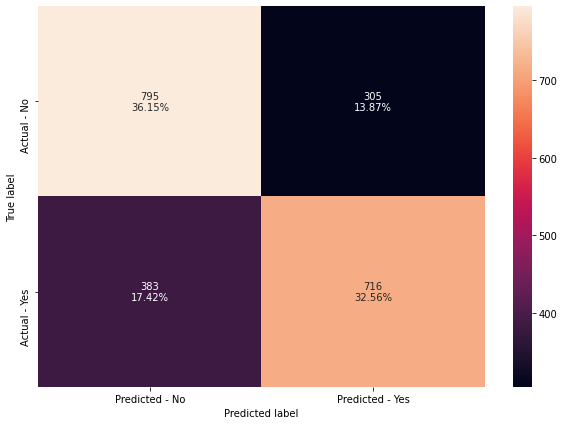

In [ ]:
print(logistic_regression_test_case_12(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers, Logistic Regression**


In [ ]:
def logistic_regression_test_case_13(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  kfold_results = []
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return logistic_regression_classifier(X_train,y_train,X_test,y_test,case="test_case_3")


Accuracy on training set :  0.7060273358727314
Accuracy on test set :  0.6998635743519782
Recall on training set :  0.6895161290322581
Recall on test set :  0.6769790718835305
Precision on training set :  0.7131603336422614
Precision on test set :  0.7092469018112488
F1 on training set :  0.7011389521640091
F1 on test set :  0.6927374301675978
None
None


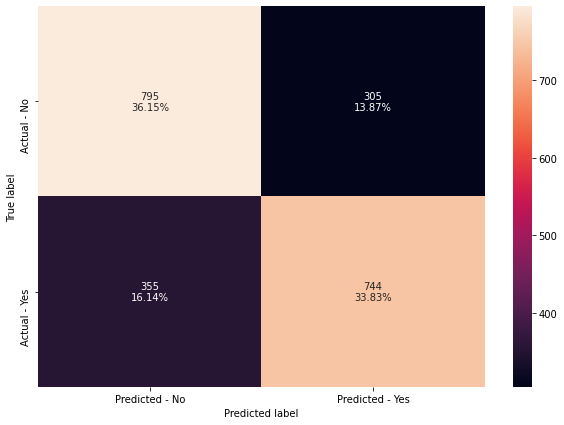

In [ ]:
print(logistic_regression_test_case_13(X,y))

**Min Max Scaler, Label Encoding,Not Removing Outliers, Logistic Regression**


In [ ]:
def logistic_regression_test_case_14(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  kfold_results = []
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return logistic_regression_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


Accuracy on training set :  0.7123011427291059
Accuracy on test set :  0.7030468394724875
Recall on training set :  0.6984767025089605
Recall on test set :  0.6751592356687898
Precision on training set :  0.7184331797235023
Precision on test set :  0.7148362235067437
F1 on training set :  0.708314402544298
F1 on test set :  0.6944314459522696
None
None


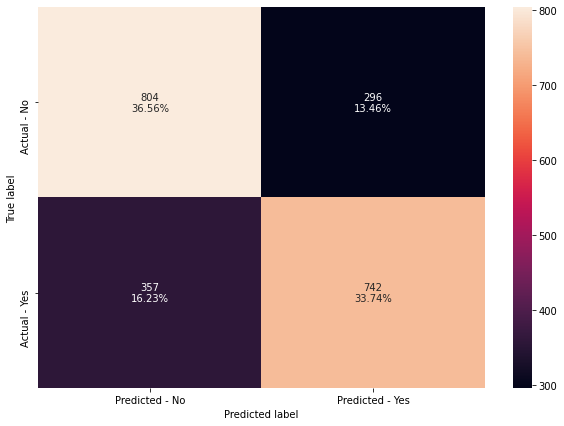

In [ ]:
print(logistic_regression_test_case_14(X,y))

#**5. Model performance improvement - Bagging**

In Bagging models, the random forest giving the good accuracy, f1 score and recall, however decision tree not giving the better results with different hyper-parameters

#**6. Model building - Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

def AdaBoost_Classifier(X_train,y_train,X_test,y_test,case):
  ada_boost = AdaBoostClassifier(n_estimators=100, random_state=0)
  search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1]}
  
  ada_boost=GridSearchCV(estimator=ada_boost,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)
  ada_boost.fit(X_train,y_train)
  scores_LR = get_metrics_score(ada_boost,X_train,X_test,y_train,y_test,flag=True)
  acc_table["Initial Adaboost Classifier"+str(case)] = scores_LR

  return print(make_confusion_matrix(ada_boost,X_test,y_test))

**Standard Scaler, Label Encoding, Removing Outliers, Adaboost Classifier**

In [ ]:
def adaboost_classifier_test_case_15(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return AdaBoost_Classifier(X_train,y_train,X_test,y_test,case="test_case_1")

  



Accuracy on training set :  0.7553215326013892
Accuracy on test set :  0.7357889949977262
Recall on training set :  0.774641577060932
Recall on test set :  0.7443130118289354
Precision on training set :  0.7459016393442623
Precision on test set :  0.7316636851520573
F1 on training set :  0.76
F1 on test set :  0.7379341452413172
None
None


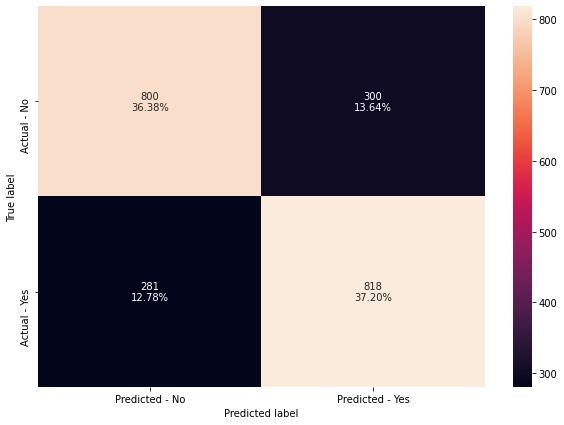

In [ ]:
print(adaboost_classifier_test_case_15(X,y))

**Min Max Scaler, Label Encoding, Removing Outliers, Adaboost Classifier**

In [ ]:
def adaboost_classifier_test_case_16(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return AdaBoost_Classifier(X_train,y_train,X_test,y_test,case="test_case_2")


Accuracy on training set :  0.7490477257450145
Accuracy on test set :  0.7335152341973624
Recall on training set :  0.7634408602150538
Recall on test set :  0.7388535031847133
Precision on training set :  0.7421602787456446
Precision on test set :  0.7308730873087309
F1 on training set :  0.7526501766784451
F1 on test set :  0.734841628959276
None
None


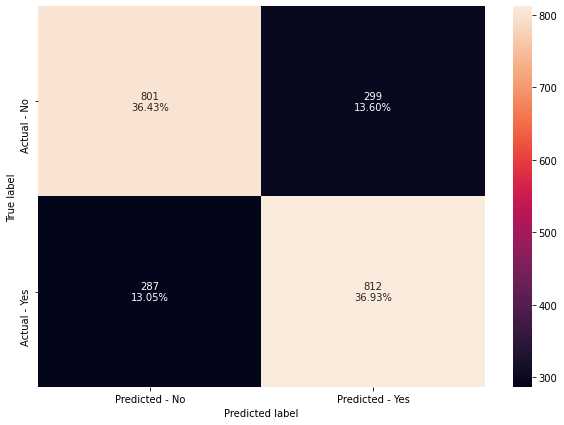

In [ ]:
print(adaboost_classifier_test_case_16(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers, Adaboost Classifier**

In [ ]:
def adaboost_classifier_test_case_17(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return AdaBoost_Classifier(X_train,y_train,X_test,y_test,case="test_case_3")


Accuracy on training set :  0.7559937261931436
Accuracy on test set :  0.7339699863574352
Recall on training set :  0.7629928315412187
Recall on test set :  0.7497725204731575
Precision on training set :  0.7525408749447636
Precision on test set :  0.7266313932980599
F1 on training set :  0.7577308120133482
F1 on test set :  0.7380206000895657
None
None


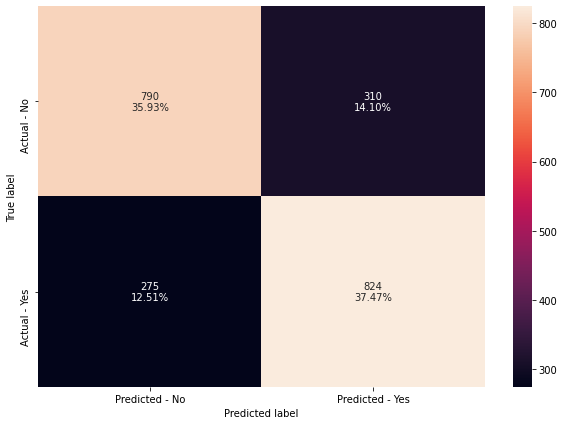

In [ ]:
print(adaboost_classifier_test_case_17(X,y))

**Min Max Scaler, Label Encoding,Not Removing Outliers, Adaboost Classifier**

In [ ]:
def adaboost_classifier_test_case_18(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return AdaBoost_Classifier(X_train,y_train,X_test,y_test,case="test_case_4")


Accuracy on training set :  0.7501680483979386
Accuracy on test set :  0.7439745338790359
Recall on training set :  0.7674731182795699
Recall on test set :  0.7652411282984531
Precision on training set :  0.7418796015591165
Precision on test set :  0.7338568935427574
F1 on training set :  0.7544593701827792
F1 on test set :  0.7492204899777282
None
None


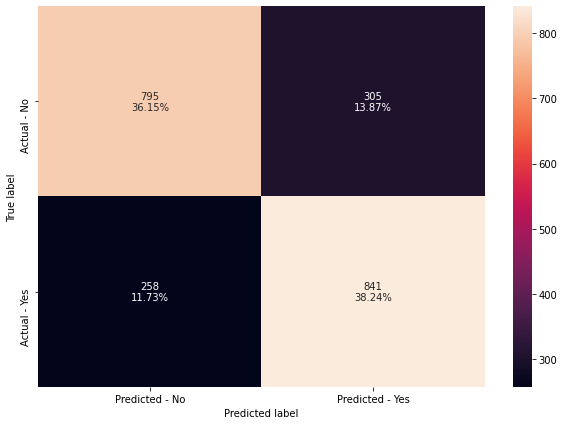

In [ ]:
print(adaboost_classifier_test_case_18(X,y))

#**XGBoost Classifier**

In [ ]:
def xgboost_classifier(X_train,y_train,X_test,y_test,case):
  xgb_model = xgb.XGBClassifier(random_state=42)
  xgb_model.fit(X_train, y_train)


  scores_LR = get_metrics_score(xgb_model,X_train,X_test,y_train,y_test,flag=True)
  
  acc_table["Initial XGBoost Classifier"+str(case)] = scores_LR

  return print(make_confusion_matrix(xgb_model,X_test,y_test))

**Standard Scaler, Label Encoding, Removing Outliers, XGboost Classifier**

In [ ]:
def xgboost_classifier_test_case_19(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  
  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return xgboost_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


Accuracy on training set :  0.8138023750840242
Accuracy on test set :  0.7980900409276944
Recall on training set :  0.8064516129032258
Recall on test set :  0.7852593266606005
Precision on training set :  0.8185538881309686
Precision on test set :  0.8057889822595705
F1 on training set :  0.8124576844955991
F1 on test set :  0.7953917050691244
None
None


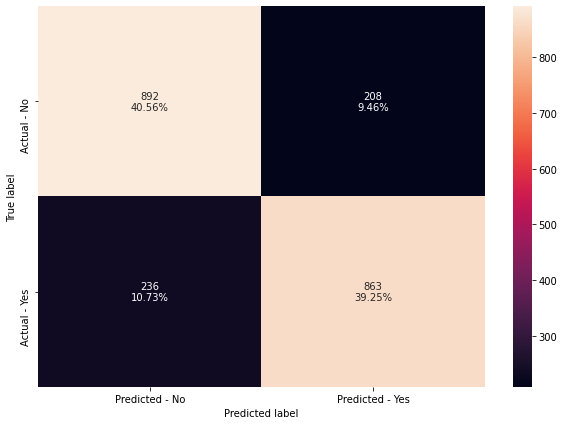

In [ ]:
print(xgboost_classifier_test_case_19(X,y))

**Min Max Scaler, Label Encoding, Removing Outliers, XGboost Classifier**

In [ ]:
def xgboost_classifier_test_case_20(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return xgboost_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


Accuracy on training set :  0.8138023750840242
Accuracy on test set :  0.8030923146884947
Recall on training set :  0.8100358422939068
Recall on test set :  0.8034576888080073
Precision on training set :  0.8162528216704289
Precision on test set :  0.8027272727272727
F1 on training set :  0.8131324488419158
F1 on test set :  0.8030923146884947
None
None


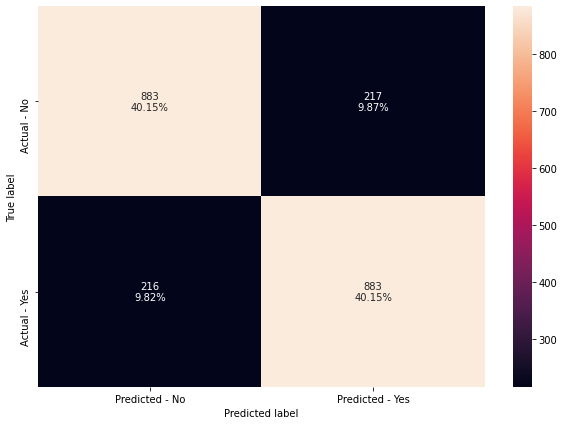

In [ ]:
print(xgboost_classifier_test_case_20(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers, XGboost Classifier**

In [ ]:
def xgboost_classifier_test_case_21(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return xgboost_classifier(X_train,y_train,X_test,y_test,case="test_case_3")


Accuracy on training set :  0.8090970199417432
Accuracy on test set :  0.7698954070031833
Recall on training set :  0.7894265232974911
Recall on test set :  0.7206551410373067
Precision on training set :  0.8218283582089553
Precision on test set :  0.7991927346115035
F1 on training set :  0.8053016453382085
F1 on test set :  0.7578947368421053
None
None


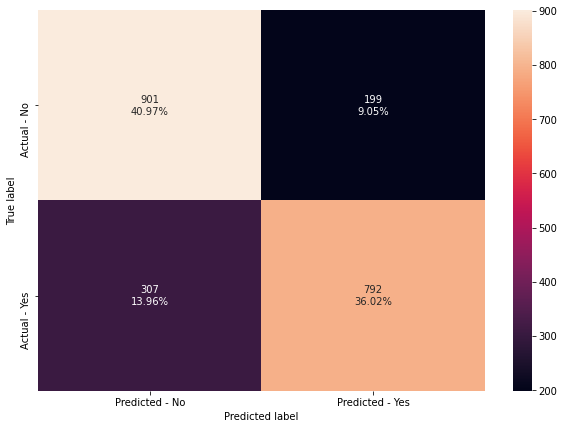

In [ ]:
print(xgboost_classifier_test_case_21(X,y))

**Min Max Scaler, Label Encoding,Not Removing Outliers, XGboost Classifier**

In [ ]:
def xgboost_classifier_test_case_22(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return xgboost_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


Accuracy on training set :  0.8232130853685862
Accuracy on test set :  0.8053660754888585
Recall on training set :  0.817652329749104
Recall on test set :  0.7979981801637852
Precision on training set :  0.8269143633892161
Precision on test set :  0.8097876269621422
F1 on training set :  0.8222572651498085
F1 on test set :  0.8038496791934006
None
None


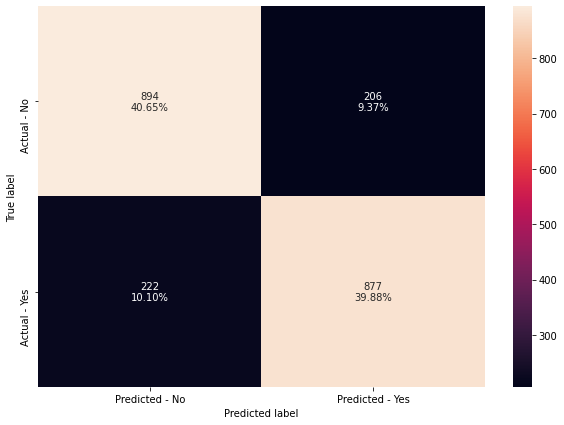

In [ ]:
print(xgboost_classifier_test_case_22(X,y))

#**Stacking Classifier**

In [ ]:

def stacking_classifier(X_train,y_train,X_test,y_test,case):
  estimators = [
     ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
     ('svr', make_pipeline(StandardScaler(),LinearSVC(random_state=42)))]
  stacking = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
  stacking.fit(X_train,y_train)

  scores_LR = get_metrics_score(stacking,X_train,X_test,y_train,y_test,flag=True)
  
  acc_table["Initial Stacking Classifier"+str(case)] = scores_LR

  return print(make_confusion_matrix(stacking,X_test,y_test))

**Standard Scaler, Label Encoding, Removing Outliers, Stacking Classifier**

In [ ]:
def stacking_classifier_test_case_23(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)
  
  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return stacking_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


Accuracy on training set :  0.9977593546941519
Accuracy on test set :  0.9690768531150523
Recall on training set :  0.996415770609319
Recall on test set :  0.9699727024567789
Precision on training set :  0.9991015274034142
Precision on test set :  0.9682107175295186
F1 on training set :  0.9977568416330193
F1 on test set :  0.969090909090909
None
None


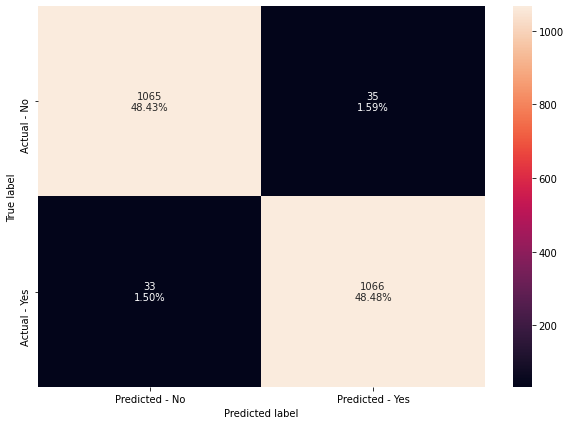

In [ ]:
print(stacking_classifier_test_case_23(X,y))

**Min Max Scaler, Label Encoding, Removing Outliers, Stacking Classifier**

In [ ]:
def stacking_classifier_test_case_24(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return stacking_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


Accuracy on training set :  0.9984315482859063
Accuracy on test set :  0.9749886311959982
Recall on training set :  0.9982078853046595
Recall on test set :  0.986351228389445
Precision on training set :  0.9986553115194979
Precision on test set :  0.9644128113879004
F1 on training set :  0.9984315482859063
F1 on test set :  0.9752586594691859
None
None


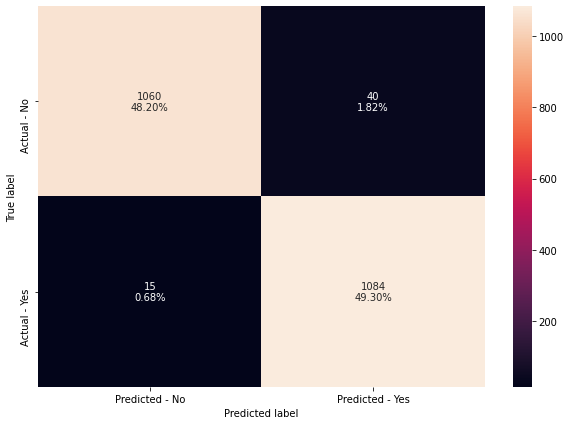

In [ ]:
print(stacking_classifier_test_case_24(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers, Stacking Classifier**

In [ ]:
def stacking_classifier_test_case_25(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  


  X_train,y_train,X_test,y_test = model_selection(X,y)
  return stacking_classifier(X_train,y_train,X_test,y_test,case="test_case_3")

  

Accuracy on training set :  0.9982074837553215
Accuracy on test set :  0.9713506139154161
Recall on training set :  0.9977598566308243
Recall on test set :  0.9708826205641492
Precision on training set :  0.9986547085201793
Precision on test set :  0.9717668488160291
F1 on training set :  0.9982070820259973
F1 on test set :  0.971324533454711
None
None


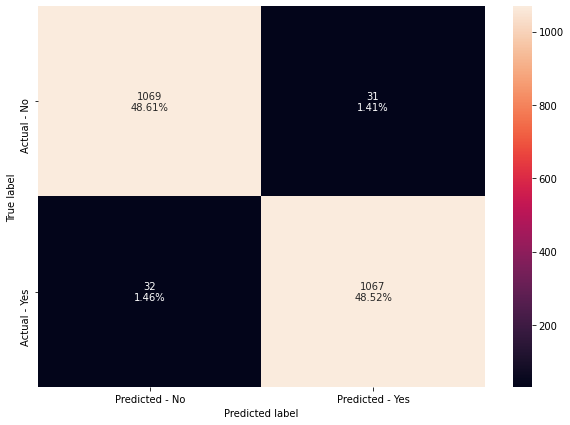

In [ ]:
print(stacking_classifier_test_case_25(X,y))

**Min Max Scaler, Label Encoding,Not Removing Outliers, Stacking Classifier**

In [ ]:
def stacking_classifier_test_case_26(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  
  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  
  X_train,y_train,X_test,y_test = model_selection(X,y)
  return stacking_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


Accuracy on training set :  0.9973112256329822
Accuracy on test set :  0.979081400636653
Recall on training set :  0.9959677419354839
Recall on test set :  0.9872611464968153
Precision on training set :  0.9986522911051213
Precision on test set :  0.9713518352730528
F1 on training set :  0.9973082099596231
F1 on test set :  0.9792418772563177
None
None


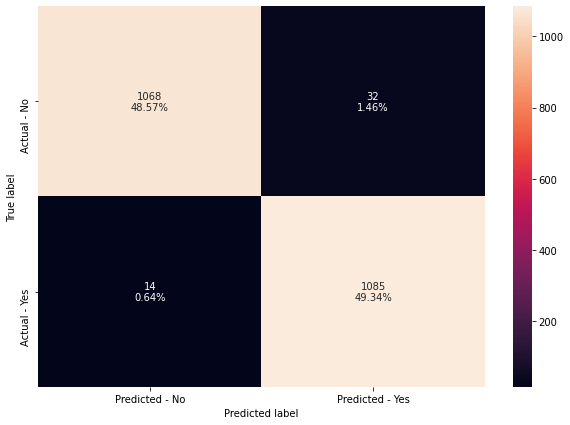

In [ ]:
print(stacking_classifier_test_case_26(X,y))

#**Gradient Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
def gradient_boosting_classifier(X_train,y_train,X_test,y_test,case):

  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)

  scores_LR = get_metrics_score(clf,X_train,X_test,y_train,y_test,flag=True)
  acc_table["Initial Graient_Bossting"+str(case)] = scores_LR

  return print(make_confusion_matrix(clf,X_test,y_test))


**Standard Scaler, Label Encoding, Removing Outliers, Gradient Classifier**

In [ ]:
def gradient_classifier_test_case_27(X,y):
  X = standard_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return gradient_boosting_classifier(X_train,y_train,X_test,y_test,case="test_case_1")


Accuracy on training set :  0.7515124355814474
Accuracy on test set :  0.7221464301955435
Recall on training set :  0.7517921146953405
Recall on test set :  0.707916287534122
Precision on training set :  0.7514554411106136
Precision on test set :  0.7284644194756554
F1 on training set :  0.7516237402015676
F1 on test set :  0.7180433779418551
None
None


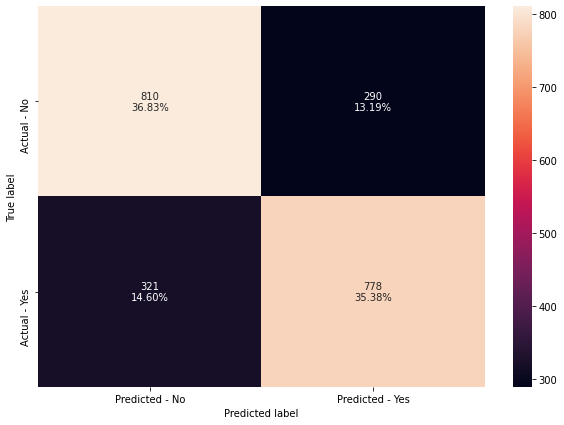

In [ ]:
print(gradient_classifier_test_case_27(X,y))

**Min Max Scaler, Label Encoding, Removing Outliers, Gradient Classifier**

In [ ]:
def gradient_classifier_test_case_28(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)
  X = remove_outlier_value(X)

  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return gradient_boosting_classifier(X_train,y_train,X_test,y_test,case="test_case_2")


Accuracy on training set :  0.7564418552543133
Accuracy on test set :  0.7435197817189632
Recall on training set :  0.7674731182795699
Recall on test set :  0.7570518653321201
Precision on training set :  0.7509864094695309
Precision on test set :  0.7369353410097431
F1 on training set :  0.7591402614668734
F1 on test set :  0.7468581687612208
None
None


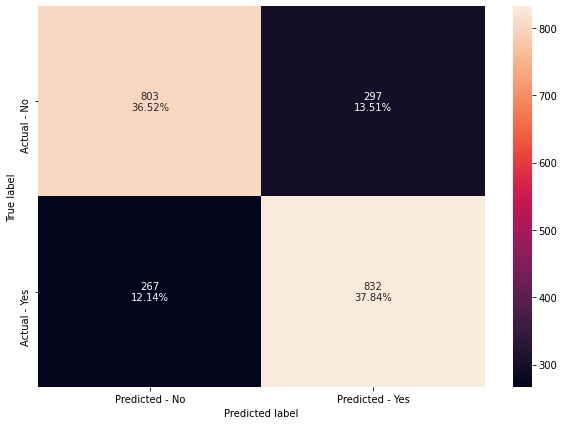

In [ ]:
print(gradient_classifier_test_case_28(X,y))

**Min Max Scaler, One-Hot Encoding,Not Removing Outliers,Gradient Classifier**

In [ ]:
def gradient_classifier_test_case_29(X,y):
  X = min_max_scaler(X)
  X = one_hot_encoding(X,column)
  
  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return gradient_boosting_classifier(X_train,y_train,X_test,y_test,case="test_case_3")


Accuracy on training set :  0.7584584360295765
Accuracy on test set :  0.7389722601182356
Recall on training set :  0.7706093189964157
Recall on test set :  0.7470427661510464
Precision on training set :  0.752405949256343
Precision on test set :  0.7350044762757386
F1 on training set :  0.7613988490482514
F1 on test set :  0.7409747292418772
None
None


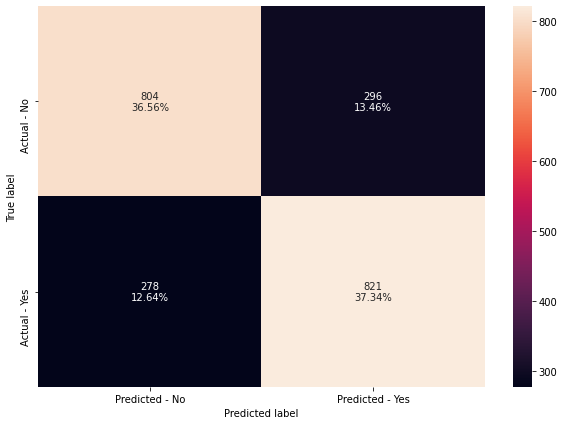

In [ ]:
print(gradient_classifier_test_case_29(X,y))

**Min Max Scaler, Label Encoding,Not Removing Outliers,Gradient Classifier**



In [ ]:
def gradient_classifier_test_case_30(X,y):
  X = min_max_scaler(X)
  X = label_encoding(X,column)

  X, y = sm.fit_sample(X, y.ravel())
  X =pd.DataFrame(X,columns=column_names)
  y=pd.DataFrame(y)  
  

  X_train,y_train,X_test,y_test = model_selection(X,y)
  return gradient_boosting_classifier(X_train,y_train,X_test,y_test,case="test_case_4")


Accuracy on training set :  0.7465830159085817
Accuracy on test set :  0.7244201909959073
Recall on training set :  0.7504480286738351
Recall on test set :  0.7197452229299363
Precision on training set :  0.7447754557581148
Precision on test set :  0.7263544536271809
F1 on training set :  0.7476009819236777
F1 on test set :  0.7230347349177331
None
None


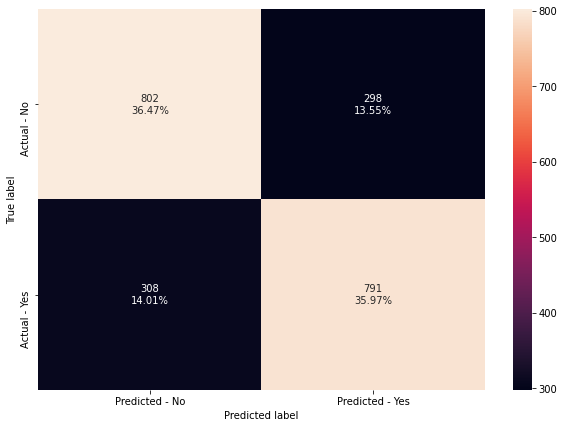

In [ ]:
print(gradient_classifier_test_case_30(X,y))

#**7. Model performance improvement - Boosting**

In bossting model, the Stacking Classifier giving the best accuracy, recall and f1 score

#**8. Model performance evaluation**

Basically, to check model performance, mostly accuracy metric is used to determined the performance, however, it doesn't estimates the class imbalancing issue in a model,so that accuracy can be high in that case.To check the correct performance of a model, we can use f1-score and precsion, recall metric

In [ ]:
overall_comparison_frame = pd.DataFrame(acc_table,index = ["Train_Accuracy","Test_Accuracy", "Train_Recall","Test_Recall", "Train_Precision", "Test_Precision", "Train_F1-Score", "Test_F1-Score"])
overall_comparison_frame

,Initial Decision Tree test_case_1,Initial Decision Tree test_case_2,Initial Decision Tree test_case_3,Initial Decision Tree test_case_4,Initial Decision Tree test_case_5,Initial Decision Tree test_case_6,Initial Random Foresttest_case_1,Initial Random Foresttest_case_2,Initial Random Foresttest_case_3,Initial Random Foresttest_case_4,Initial Logistic Regressiontest_case_1,Initial Logistic Regressiontest_case_2,Initial Logistic Regressiontest_case_3,Initial Logistic Regressiontest_case_4,Initial Adaboost Classifiertest_case_1,Initial Adaboost Classifiertest_case_2,Initial Adaboost Classifiertest_case_3,Initial Adaboost Classifiertest_case_4,Initial XGBoost Classifiertest_case_1,Initial XGBoost Classifiertest_case_2,Initial XGBoost Classifiertest_case_3,Initial XGBoost Classifiertest_case_4,Initial Stacking Classifiertest_case_1,Initial Stacking Classifiertest_case_2,Initial Stacking Classifiertest_case_3,Initial Stacking Classifiertest_case_4,Initial Graient_Bosstingtest_case_1,Initial Graient_Bosstingtest_case_2,Initial Graient_Bosstingtest_case_3,Initial Graient_Bosstingtest_case_4
Train_Accuracy,0.869819,0.863545,0.875868,0.881246,0.869370,0.874300,0.999552,0.999552,0.999552,0.999776,0.708044,0.704459,0.706027,0.712301,0.755322,0.749048,0.755994,0.750168,0.813802,0.813802,0.809097,0.823213,0.997759,0.998432,0.998207,0.997311,0.751512,0.756442,0.758458,0.746583
Test_Accuracy,0.848113,0.839927,0.862665,0.846749,0.848568,0.835380,0.978172,0.971805,0.974534,0.974079,0.686676,0.687131,0.699864,0.703047,0.735789,0.733515,0.733970,0.743975,0.798090,0.803092,0.769895,0.805366,0.969077,0.974989,0.971351,0.979081,0.722146,0.743520,0.738972,0.724420
Train_Recall,0.922939,0.887545,0.926075,0.936828,0.918907,0.936828,1.000000,1.000000,1.000000,1.000000,0.690412,0.681452,0.689516,0.698477,0.774642,0.763441,0.762993,0.767473,0.806452,0.810036,0.789427,0.817652,0.996416,0.998208,0.997760,0.995968,0.751792,0.767473,0.770609,0.750448
Test_Recall,0.911738,0.880801,0.920837,0.906278,0.913558,0.909918,0.996360,0.993631,0.997270,0.989991,0.651501,0.651501,0.676979,0.675159,0.744313,0.738854,0.749773,0.765241,0.785259,0.803458,0.720655,0.797998,0.969973,0.986351,0.970883,0.987261,0.707916,0.757052,0.747043,0.719745
Train_Precision,0.834346,0.846943,0.841612,0.843145,0.836119,0.832736,0.999105,0.999105,0.999105,0.999552,0.715745,0.714420,0.713160,0.718433,0.745902,0.742160,0.752541,0.741880,0.818554,0.816253,0.821828,0.826914,0.999102,0.998655,0.998655,0.998652,0.751455,0.750986,0.752406,0.744775
Test_Precision,0.808717,0.814130,0.824776,0.809756,0.808374,0.791766,0.961370,0.952049,0.953873,0.959436,0.700587,0.701273,0.709247,0.714836,0.731664,0.730873,0.726631,0.733857,0.805789,0.802727,0.799193,0.809788,0.968211,0.964413,0.971767,0.971352,0.728464,0.736935,0.735004,0.726354
Train_F1-Score,0.876409,0.866769,0.881826,0.887521,0.875560,0.881720,0.999552,0.999552,0.999552,0.999776,0.702851,0.697546,0.701139,0.708314,0.760000,0.752650,0.757731,0.754459,0.812458,0.813132,0.805302,0.822257,0.997757,0.998432,0.998207,0.997308,0.751624,0.759140,0.761399,0.747601
Test_F1-Score,0.857143,0.846154,0.870163,0.855303,0.857753,0.846740,0.978552,0.972395,0.975089,0.974474,0.675153,0.675472,0.692737,0.694431,0.737934,0.734842,0.738021,0.749220,0.795392,0.803092,0.757895,0.803850,0.969091,0.975259,0.971325,0.979242,0.718043,0.746858,0.740975,0.723035


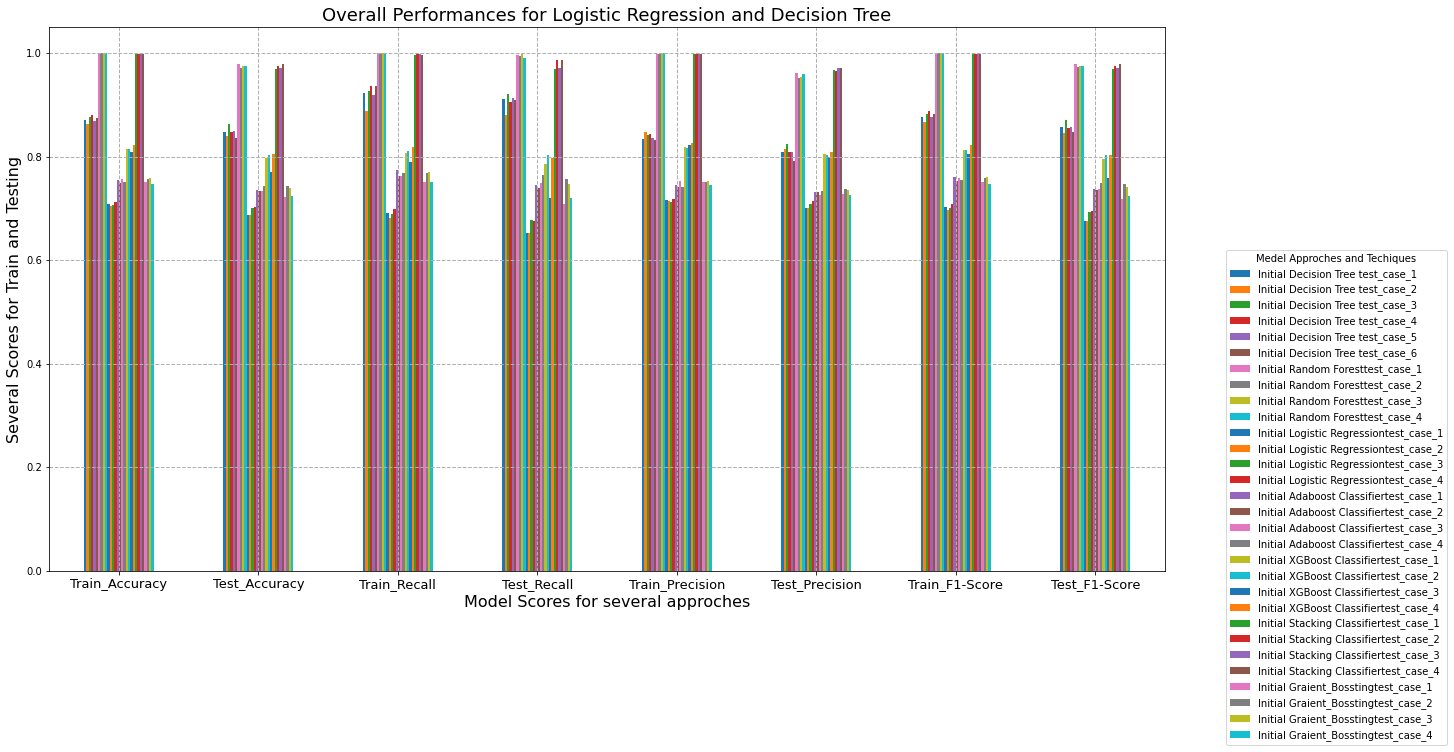

In [ ]:
ax = overall_comparison_frame.plot(kind="bar")
fig = ax.get_figure() # Get a Matplotlib figure from the axes object for formatting purposes
fig.set_size_inches(20, 10)
# Change the axes labels
ax.set_title("Overall Performances for Logistic Regression and Decision Tree",fontsize = 18)
ax.set_xlabel("Model Scores for several approches",fontsize=16)
ax.set_ylabel("Several Scores for Train and Testing",fontsize=16)
plt.xticks(rotation =0,fontsize=13)
plt.grid(linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor = (1.05, 0.6),title="Medel Approches and Techiques",)
plt.show()

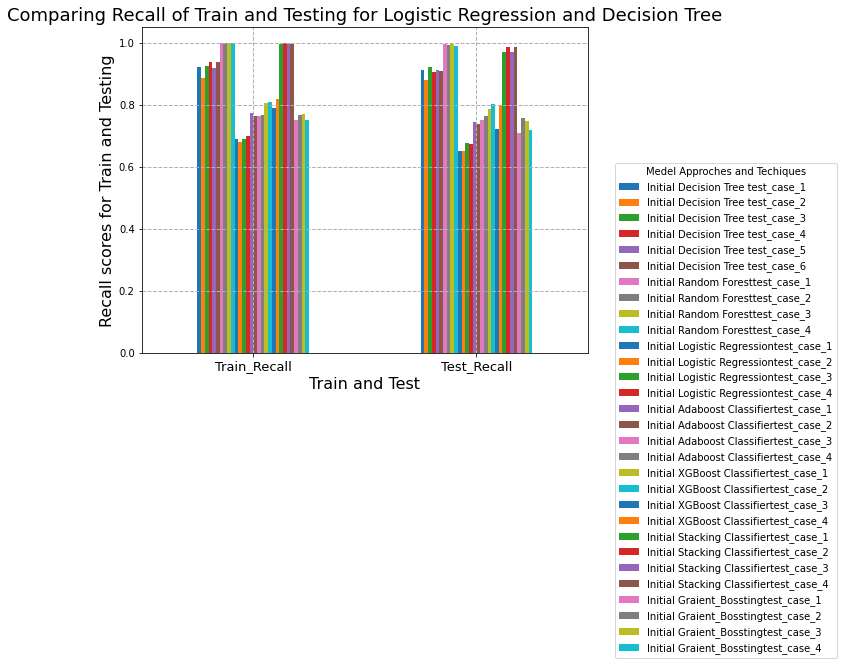

In [ ]:
recall_acc = overall_comparison_frame.loc[["Train_Recall","Test_Recall"]]
ax = recall_acc.plot(kind="bar")
fig = ax.get_figure() # Get a Matplotlib figure from the axes object for formatting purposes
fig.set_size_inches(8, 6)
# Change the axes labels
ax.set_title("Comparing Recall of Train and Testing for Logistic Regression and Decision Tree",fontsize = 18)
ax.set_xlabel("Train and Test",fontsize=16)
ax.set_ylabel("Recall scores for Train and Testing",fontsize=16)
plt.xticks(rotation =0,fontsize=13)
plt.grid(linestyle='--', linewidth=1)
plt.legend(bbox_to_anchor = (1.05, 0.6),title="Medel Approches and Techiques",)
plt.show()